In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from torch.utils.data import TensorDataset, DataLoader
import random

In [2]:
import camb

In [3]:
omega_m = 1.755000000000000171e-01
omega_b = 6.681000000000000827e-02
h = 7.737000000000000544e-01
ns = 8.849000000000000199e-01
sigma_8 = 6.641000000000000236e-01

omega_c = omega_m - omega_b

Mnu = 0.0
Nnu = 0
omega_k = 0.0
hierarchy = 'degenerate'
Neff = 3.046
tau = None

In [4]:
pars     = camb.CAMBparams()
pars.set_accuracy(AccuracyBoost=5.0, lSampleBoost=5.0, lAccuracyBoost=5.0, DoLateRadTruncation=True)
pars.set_cosmology(H0=h*100.0, ombh2=omega_b*h**2, omch2=omega_c*h**2, 
                       mnu=Mnu, omk=omega_k, neutrino_hierarchy=hierarchy, 
                       num_massive_neutrinos=Nnu, nnu=Neff, tau=tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.03999324700890001
 omch2 = 0.06506310458610001
 omk = 0.0
 omnuh2 = 0.0
 H0 = 77.37
 TCMB = 2.7255
 YHe = 0.2507143372729528
 num_nu_massless = 3.046
 num_nu_massive = 0
 nu_mass_eigenstates = 0
 share_delta_neff = False
 nu_mass_degeneracies = []
 nu_mass_fractions = []
 nu_mass_numbers = []
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 0.0
   nrunrun = 0.0
   

In [5]:
redshifts = [0]
pivot_scalar = 0.05
pivot_tensor = 0.05
kmax         = 10.0
k_per_logint = 20
As           = 2.13e-9

In [6]:
pars.InitPower.set_params(As=As, ns=ns, 
                              pivot_scalar=pivot_scalar, pivot_tensor=pivot_tensor)


class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.8849
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2.13e-09
 At = 1.0
 

In [7]:
pars.set_matter_power(redshifts=redshifts, kmax=kmax, k_per_logint=k_per_logint)


class: <CAMBparams>
 WantCls = True
 WantTransfer = True
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = True
   accurate_massive_neutrinos = False
   kmax = 10.0
   k_per_logint = 20
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.03999324700890001
 omch2 = 0.06506310458610001
 omk = 0.0
 omnuh2 = 0.0
 H0 = 77.37
 TCMB = 2.7255
 YHe = 0.2507143372729528
 num_nu_massless = 3.046
 num_nu_massive = 0
 nu_mass_eigenstates = 0
 share_delta_neff = False
 nu_mass_degeneracies = []
 nu_mass_fractions = []
 nu_mass_numbers = []
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.8849
   nrun = 0.0
   nrunrun = 0.0
 

In [ ]:
results = camb.get_results(pars)

In [ ]:
hierarchy    = 'degenerate'
Mnu          = 0.0 #eV
Nnu          = 0   #number of massive neutrinos
Neff         = 3.046
As           = 2.13e-9
tau          = None
Omega_k      = 0.0
pivot_scalar = 0.05
pivot_tensor = 0.05
kmax         = 10.0
k_per_logint = 20
redshifts    = [1]

Omega_m = 0.1
Omega_b = 0.03
h = 0.5
ns = 0.8
s8 = 0.6
#              [Om,  Ob,   h,   ns,  s8]
Min = np.array([0.1, 0.03, 0.5, 0.8, 0.6])
Max = np.array([0.5, 0.07, 0.9, 1.2, 1.0])

# whether generate standard or paired fixed simulations
standard = True
########################################################################################



numbers = [1]


# do a loop over all the points in the latin hypercube
for i in numbers:


    ##### run CAMB #####
    Omega_c  = Omega_m - Omega_b
    pars     = camb.CAMBparams()

    # set accuracy of the calculation
    pars.set_accuracy(AccuracyBoost=5.0, lSampleBoost=5.0, lAccuracyBoost=5.0, 
                      DoLateRadTruncation=True)

    # set value of the cosmological parameters
    pars.set_cosmology(H0=h*100.0, ombh2=Omega_b*h**2, omch2=Omega_c*h**2, 
                       mnu=Mnu, omk=Omega_k, neutrino_hierarchy=hierarchy, 
                       num_massive_neutrinos=Nnu, nnu=Neff, tau=tau)
                   
    # set the value of the primordial power spectrum parameters
    pars.InitPower.set_params(As=As, ns=ns, 
                              pivot_scalar=pivot_scalar, pivot_tensor=pivot_tensor)

    # set redshifts, k-range and k-sampling
    pars.set_matter_power(redshifts=redshifts, kmax=kmax, k_per_logint=k_per_logint)

    # compute results
    results = camb.get_transfer_functions(pars)


## Convert text files to tables

In [2]:
def txt_to_table(sim_num, redshift): # converts text file of simulation to an astropy table
    simulation = f'latin_hypercube/{sim_num}/CF_m_1024_z={redshift}.txt' # input text file
    sim_list = []
    for line in open(simulation, 'r'): # get each line
        item = line.rstrip() # strip off newline and any other trailing whitespace
        sim_list.append(item)
        
    r_list, xi_list = [], []
    for item in sim_list: # get radius and correlation from each line
        r, xi = item.split() # each line has both radius and correlation, so split
        r_list.append(float(r))
        xi_list.append(float(xi))
        
    sim_table = Table([r_list, xi_list], names=('r', 'xi')) # astropy table
    return sim_table

## Sample Plots

#### Xi vs. r truncated

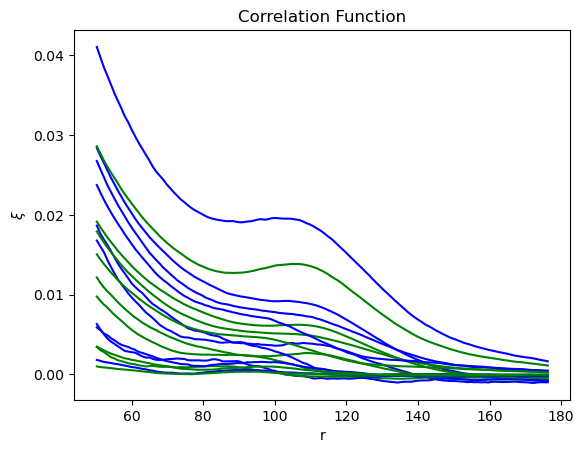

In [4]:
start=50 # start and end indices (not necessarily r)
end=180
for x in range(0,9): # simulation numbers to plot (0-2000)
    tablexz0 = txt_to_table(x, 0)[start:end] # z = 0
    tablexz3 = txt_to_table(x, 0.5)[start:end] # z = 3
    
    
    plt.plot(tablexz0['r'], tablexz0['xi'], c='b')
    plt.plot(tablexz3['r'], tablexz3['xi'], c='g')

    plt.xlabel('r')
    plt.ylabel('$\\xi$')
    plt.title('Correlation Function')

#### Xi r^2 vs. r truncated

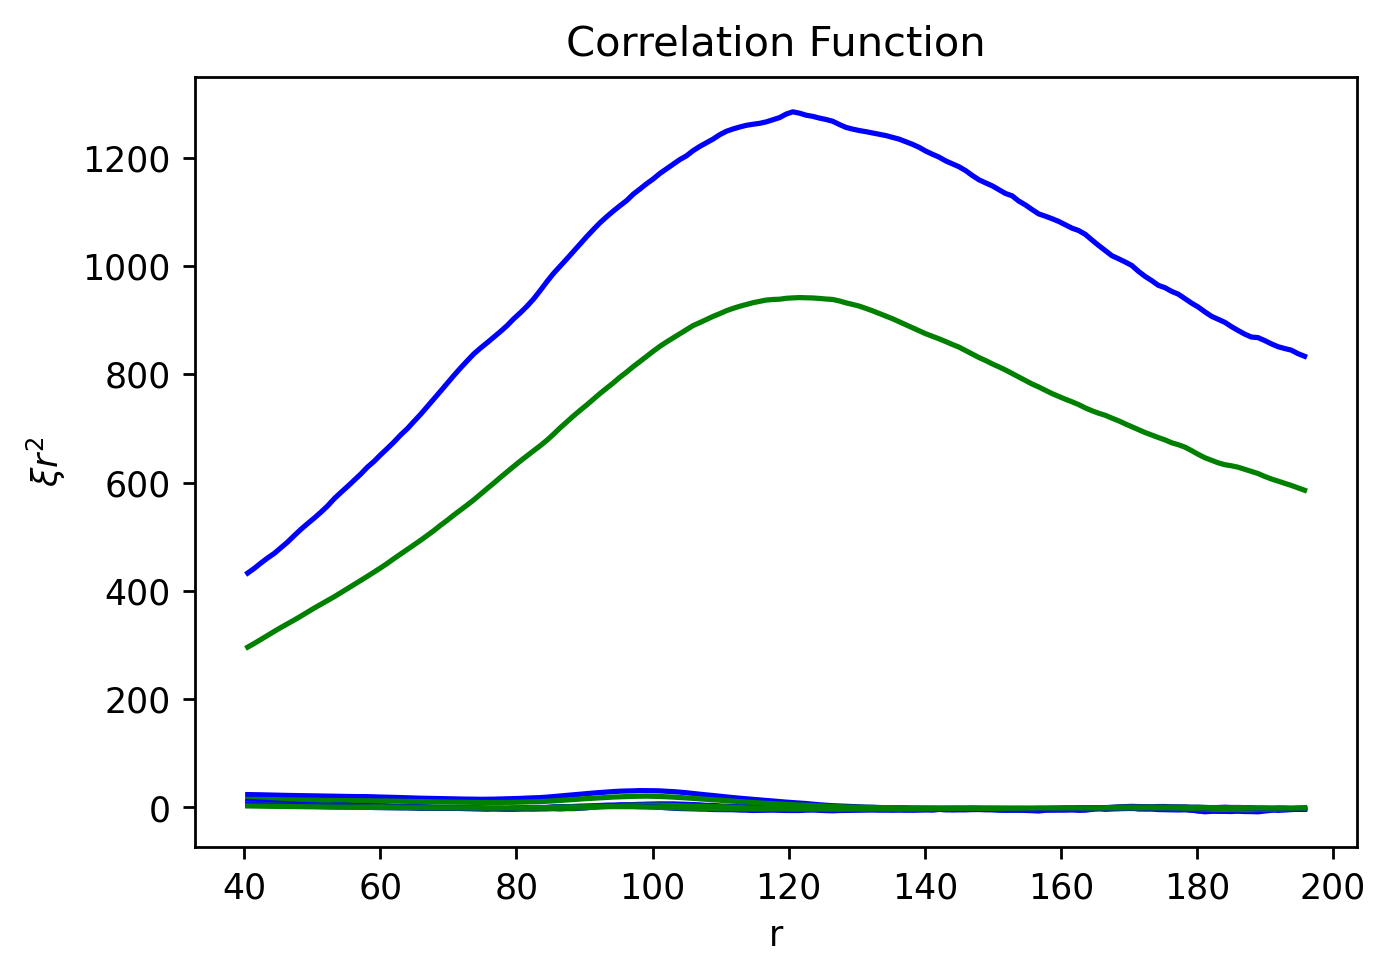

In [99]:
start=40 # start and end indices (not necessarily r)
end=200


fig = plt.figure(figsize=[6,4], dpi=250)
for x in range(560, 565): # simulation numbers to plot (0-2000)
    tablexz0 = txt_to_table(x, 0)[start:end] # z = 0
    tablexz3 = txt_to_table(x, 0.5)[start:end] # z = 3
    
    plt.plot(tablexz0['r'], tablexz0['xi']*tablexz0['r']**2, c='b')
    plt.plot(tablexz3['r'], tablexz3['xi']*tablexz3['r']**2, c='g')
    
    plt.xlabel('r')
    plt.ylabel('$\\xi r^2$')
    plt.title('Correlation Function')

# Neural Network

In [3]:
import torch
from torch import nn, optim

#### Simple 2-layer neural network (no activation function)

In [4]:
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.input_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=kwargs["features"]
        )
        
        
        self.output_layer = nn.Linear(
            in_features=kwargs["features"], out_features=kwargs["output_shape"]
        )

    def forward(self, features):
        encoded = self.input_layer(features)
        reconstructed = self.output_layer(encoded)
        return reconstructed

In [5]:
def binCorr(corrTable, binSize):
    rad = corrTable['r']
    xi = corrTable['xi']
    
    rSpacing = np.diff(rad)
    
    npoints = binSize + 1 # binSize is the width of each bin, and there is one more point than bins
    
    radBins = rad[0:-1:binSize]
    originalBinWidths = 0.5*np.diff(rad)[0:-1:binSize]
    if len(radBins) > len(originalBinWidths):
        radBinBounds = radBins[:-1] + 0.5*np.diff(rad)[0:-1:binSize] # new bin boundaries
    else:
        radBinBounds = radBins + 0.5*np.diff(rad)[0:-1:binSize] # new bin boundaries

    newRad = radBinBounds[:-1] + np.diff(radBinBounds)/2. # new bin centers
    binWidths = np.diff(radBinBounds)/2.

    newCorrTable = np.zeros(len(newRad))
    
    for i in range(len(newRad)):
        newCorr = 0
        for j in range(binSize):
            point = binSize*i + j + 1
            spacePoint = binSize*i + j
            pointCorr = ((rad[point] + (rSpacing[spacePoint+1]/2))**3 - (rad[point] - (rSpacing[spacePoint]/2))**3)*xi[point]
            newCorr += pointCorr
        

        newCorr /= ((newRad[i] + binWidths[i])**3 - (newRad[i] - binWidths[i])**3)
        
        newCorrTable[i] = newCorr
    

        
    
    binnedTable = Table([newRad, newCorrTable], names=('r', 'xi')) # astropy table

    return binnedTable

In [6]:
def dataPull(zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, binning=True):
    inputs_t = []
    outputs_t = []
    
    inputs_r = []
    outputs_r = []
    
    # get data
    for x in range(0, 2000): # all simulations
        inputTable = txt_to_table(x, zInput)
        outputTable = txt_to_table(x, zOutput)
        if binning:
            inputTable = binCorr(inputTable, nBins)
            outputTable = binCorr(outputTable, nBins)
        
        inputTable = inputTable[(inputTable['r'] <= inputEnd) & (inputTable['r'] >= inputStart)]
        outputTable = outputTable[(outputTable['r'] <= outputEnd) & (outputTable['r'] >= outputStart)]


        inputs_t.append(inputTable['xi']*inputTable['r']**2)
        outputs_t.append(outputTable['xi']*outputTable['r']**2)
                         
        inputs_r.append(inputTable['r'])
        outputs_r.append(outputTable['r'])
        
    return inputs_t, outputs_t, inputs_r, outputs_r 

In [7]:
def meanVar(inputs_t, outputs_t):
    inputs = np.array(inputs_t)
    outputs = np.array(outputs_t)

    mean_inputs = np.mean(inputs, 0)
    mean_outputs = np.mean(outputs, 0)

    var_inputs = np.sqrt(np.var(inputs, 0))
    var_outputs = np.sqrt(np.var(outputs, 0))
    
    return mean_inputs, mean_outputs, var_inputs, var_outputs

In [8]:
def setDataloaders(inputs_t, outputs_t):
    inputs = np.array(inputs_t)
    outputs = np.array(outputs_t)

    # divide correlations by mean across all simulations
    # i.e. for each r, the correlations are divided by the average correlation for that r
    mean_inputs, mean_outputs, var_inputs, var_outputs = meanVar(inputs_t, outputs_t)

    inputs -= mean_inputs
    outputs -= mean_outputs

    inputs /= var_inputs
    outputs /= var_outputs

    

    
    
    
    # which simulations to train on (rest are for testing)
    train_sample_min, train_sample_max = 0, trainTestSplit


    tensor_train_x = torch.Tensor(inputs[train_sample_min:train_sample_max]) # transform to torch tensor
    tensor_train_y = torch.Tensor(outputs[train_sample_min:train_sample_max])

    tensor_test_x = torch.Tensor(inputs[train_sample_max:2000]) # transform to torch tensor
    tensor_test_y = torch.Tensor(outputs[train_sample_max:2000])


    train_dataset = TensorDataset(tensor_train_x,tensor_train_y) # create datset
    train_dataloader = DataLoader(train_dataset, shuffle=True) # create dataloader

    test_dataset = TensorDataset(tensor_test_x, tensor_test_y) # create datset
    test_dataloader = DataLoader(test_dataset, shuffle=True) # create dataloader
    
    return train_dataloader, test_dataloader

In [9]:
def trainBAOReconNN(model, train_dataloader, test_dataloader, lr=1e-5, epochs=1000):
    
    # mean-squared error loss
    criterion = nn.MSELoss()
    
    # create an optimizer object
    # Adam optimizer with learning rate + decay
    optimizer = optim.Adam(model.parameters(), lr=lr)
    decayRate = 0.999
    lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decayRate)

    #### Training ####
    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        train_loss_tot, test_loss_tot = 0, 0

        #################
        # Training Loop #
        #################
        model.train(True)
        
        # first train on small batches #
        
        r = random.randint(1, 50)
        i = 1
        
        train_loss = 0
        for batch_features, batch_labels in train_dataloader:
            # reset the gradients back to zero
            optimizer.zero_grad()

            # compute reconstructions
            model_outputs = model(batch_features)

            # compute training reconstruction loss
            train_loss += criterion(model_outputs, batch_labels)
            # train_loss = loss_criterion(outputs, batch_labels)
            
            if np.floor(i/r) == i/r:
                # compute accumulated gradients
                train_loss.backward()

                # perform parameter update based on current gradients
                optimizer.step()
                
                # reset train loss
                train_loss = 0
            
            i += 1

            
        model.train(False)
        # Full batch #
        for batch_features, batch_labels in train_dataloader:
            # reset the gradients back to zero
            optimizer.zero_grad()

            # compute reconstructions
            model_outputs = model(batch_features)

            # compute training reconstruction loss
            train_loss = criterion(model_outputs, batch_labels)
            # train_loss = loss_criterion(outputs, batch_labels)

            # compute accumulated gradients
#            train_loss.backward()

            # perform parameter update based on current gradients
#            optimizer.step()

            # add the mini-batch training loss to epoch loss
            train_loss_tot += train_loss.item()


        ################
        # Testing Loop #
        ################
        model.train(False)
        for batch_features, batch_labels in test_dataloader:
            # compute reconstructions
            model_outputs = model(batch_features)

            # compute training reconstruction loss
            test_loss = criterion(model_outputs, batch_labels)
            # test_loss = loss_criterion(outputs, batch_labels)

            # add the mini-batch training loss to epoch loss
            test_loss_tot += test_loss.item()

        # compute the epoch training loss
        train_loss_tot = train_loss_tot# / len(train_dataloader)
        test_loss_tot = test_loss_tot# / len(test_dataloader)

        # record losses
        train_losses.append(train_loss_tot)
        test_losses.append(test_loss_tot)

        # learning rate decay step
        lr_scheduler.step()

        # display the epoch losses
        print("epoch : {}/{}, train loss = {:.10f}, test loss = {:.10f}".format(epoch + 1, epochs, train_loss_tot, test_loss_tot))
        
    return model, train_losses, test_losses

In [10]:
def plotModel(model, start_plot, end_plot, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs, binning=True):
    
    # subplots stuff
    num_row = int((end_plot-start_plot)/2)
    fig, ax = plt.subplots(num_row, 2, figsize=[7,9], dpi=150)

    for x in range(start_plot, end_plot):
        inputTable = txt_to_table(x, zInput)
        outputTable = txt_to_table(x, zOutput)
        if binning:
            inputTable = binCorr(inputTable, nBins)
            outputTable = binCorr(outputTable, nBins)
        
        inputTable = inputTable[(inputTable['r'] <= inputEnd) & (inputTable['r'] >= inputStart)]
        outputTable = outputTable[(outputTable['r'] <= outputEnd) & (outputTable['r'] >= outputStart)]
        
            
        input_xi = inputTable['xi']*inputTable['r']**2
        true_xi = outputTable['xi']*outputTable['r']**2
        model_xi = model(torch.Tensor((inputTable['xi']*inputTable['r']**2-mean_inputs)/var_inputs)).detach().numpy()*var_outputs+mean_outputs

        
        ax_num = x - start_plot
        row = int(np.floor(ax_num/2))
        col = int((ax_num/2. - row)*2)
        ax[row, col].plot(inputTable['r'], input_xi, c='b')
        ax[row, col].plot(outputTable['r'], true_xi, c='g', lw=1)
        ax[row, col].plot(outputTable['r'], model_xi, c='r', lw=1)


    custom_lines = [Line2D([0], [0], color='g', lw=2),
                    Line2D([0], [0], color='r', lw=2),
                    Line2D([0], [0], color='b', lw=2)]

    if start_plot >= trainTestSplit:
        if end_plot - start_plot > 1:
            fig.suptitle(f'Validation Plots: Simulations {start_plot} - {end_plot - 1}', y=0.91)
        else:
            fig.suptitle(f'Validation Plot: Simulation {start_plot}', y=0.91)

    else:
        if end_plot - start_plot > 1:
            fig.suptitle(f'Training Plots: Simulations {start_plot} - {end_plot - 1}', y=0.91)
        else:
            fig.suptitle(f'Training Plot: Simulation {start_plot}', y=0.91)



    ax[-1, 0].set_xlabel('r')
    ax[-1, 1].set_xlabel('r')

    for i in range(num_row):
        ax[i, 0].set_ylabel('$\\xi r^2$')

    ax[0,0].legend(custom_lines, [f'True $\\xi$ at z={zOutput}', f'NN model $\\xi$ at z={zOutput}', f'Input $\\xi$ at z={zInput}'], fontsize=6)

In [11]:
def averageModel(model, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs, binning=True):
    startVal = trainTestSplit
    endVal = 2000
    
    outputTableTest = txt_to_table(startVal, zOutput)
    if binning:
            outputTableTest = binCorr(outputTableTest, nBins)
    outputTableTest = outputTableTest[(outputTableTest['r'] <= outputEnd) & (outputTableTest['r'] >= outputStart)]
    
    validation_output = np.zeros([endVal-startVal, len(outputTableTest)])
    true_output = np.zeros([endVal-startVal, len(outputTableTest)])

    for x in range(startVal, endVal):
        inputTable = txt_to_table(x, zInput)
        outputTable = txt_to_table(x, zOutput)


        if binning:
            inputTable = binCorr(inputTable, nBins)
            outputTable = binCorr(outputTable, nBins)
        
        inputTable = inputTable[(inputTable['r'] <= inputEnd) & (inputTable['r'] >= inputStart)]
        outputTable = outputTable[(outputTable['r'] <= outputEnd) & (outputTable['r'] >= outputStart)]
        
        true_xi = outputTable['xi']*outputTable['r']**2
        model_xi = model(torch.Tensor((inputTable['xi']*inputTable['r']**2-mean_inputs)/var_inputs)).detach().numpy()*var_outputs+mean_outputs
        validation_output[x-startVal] = model_xi
        true_output[x-startVal] = true_xi
        
    validation_average = np.mean(validation_output, 0)
    true_average = np.mean(true_output, 0)
    
    plt.plot(outputTableTest['r'], validation_average, c='red')
    plt.plot(outputTableTest['r'], true_average)

In [12]:
nBins = 3

# z = 0 to z = 0.5 Model

In [13]:
trainTestSplit = 1200

In [14]:
zInput, zOutput = 0, 0.5
inputStart, inputEnd = 45, 165
outputStart, outputEnd = 50, 160
inputs0, outputs05, inputsr, outputsr = dataPull(zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd)

In [15]:
input_shape = len(inputs0[0])
output_shape = len(outputs05[0])
nFeatures = 200

In [16]:
train_dataloader0_05, test_dataloader0_05 = setDataloaders(inputs0, outputs05)

In [17]:
# use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [248]:
## Set-up Model ##
    


# create model
# load it to the specified device, either gpu or cpu
model0_05 = AE(input_shape=input_shape, output_shape=output_shape, features=nFeatures).to(device)

In [251]:
model0_05, train_losses0_05, test_losses0_05 = trainBAOReconNN(model0_05, train_dataloader0_05, test_dataloader0_05, lr=1e-6, epochs=2000)

epoch : 1/2000, train loss = 0.8488090587, test loss = 0.5404899625
epoch : 2/2000, train loss = 0.8294065106, test loss = 0.5281802929
epoch : 3/2000, train loss = 0.8171512300, test loss = 0.5210385185
epoch : 4/2000, train loss = 0.8100317810, test loss = 0.5181499799
epoch : 5/2000, train loss = 0.8061359043, test loss = 0.5155926242
epoch : 6/2000, train loss = 0.8035970034, test loss = 0.5155647470
epoch : 7/2000, train loss = 0.8021326059, test loss = 0.5143041534
epoch : 8/2000, train loss = 0.8009082397, test loss = 0.5155999359
epoch : 9/2000, train loss = 0.8003857380, test loss = 0.5143917017
epoch : 10/2000, train loss = 0.7999094429, test loss = 0.5143725236
epoch : 11/2000, train loss = 0.7994694606, test loss = 0.5138480174
epoch : 12/2000, train loss = 0.7992532456, test loss = 0.5155462392
epoch : 13/2000, train loss = 0.7988392660, test loss = 0.5136111144
epoch : 14/2000, train loss = 0.7986068146, test loss = 0.5120987457
epoch : 15/2000, train loss = 0.7984171644,

epoch : 120/2000, train loss = 0.7949352611, test loss = 0.5116039375
epoch : 121/2000, train loss = 0.7944590207, test loss = 0.5088587727
epoch : 122/2000, train loss = 0.7945931785, test loss = 0.5106221857
epoch : 123/2000, train loss = 0.7946585625, test loss = 0.5113374230
epoch : 124/2000, train loss = 0.7947901216, test loss = 0.5049245435
epoch : 125/2000, train loss = 0.7955110670, test loss = 0.5035617384
epoch : 126/2000, train loss = 0.7945069739, test loss = 0.5063856539
epoch : 127/2000, train loss = 0.7946382778, test loss = 0.5051249583
epoch : 128/2000, train loss = 0.7942986454, test loss = 0.5084227162
epoch : 129/2000, train loss = 0.7947390042, test loss = 0.5105568131
epoch : 130/2000, train loss = 0.7942786100, test loss = 0.5075639650
epoch : 131/2000, train loss = 0.7943870214, test loss = 0.5061408351
epoch : 132/2000, train loss = 0.7943012729, test loss = 0.5096009039
epoch : 133/2000, train loss = 0.7942646851, test loss = 0.5086616301
epoch : 134/2000, tr

epoch : 238/2000, train loss = 0.7935491662, test loss = 0.5052647797
epoch : 239/2000, train loss = 0.7934182909, test loss = 0.5060671391
epoch : 240/2000, train loss = 0.7933088709, test loss = 0.5085506313
epoch : 241/2000, train loss = 0.7937631195, test loss = 0.5114759030
epoch : 242/2000, train loss = 0.7932730804, test loss = 0.5082407196
epoch : 243/2000, train loss = 0.7932656221, test loss = 0.5079007559
epoch : 244/2000, train loss = 0.7932499886, test loss = 0.5076394323
epoch : 245/2000, train loss = 0.7935598211, test loss = 0.5106792223
epoch : 246/2000, train loss = 0.7932696710, test loss = 0.5085494615
epoch : 247/2000, train loss = 0.7932230123, test loss = 0.5076976950
epoch : 248/2000, train loss = 0.7932688035, test loss = 0.5070954981
epoch : 249/2000, train loss = 0.7937792759, test loss = 0.5041798042
epoch : 250/2000, train loss = 0.7934023191, test loss = 0.5099203313
epoch : 251/2000, train loss = 0.7932216399, test loss = 0.5082119995
epoch : 252/2000, tr

epoch : 356/2000, train loss = 0.7924767999, test loss = 0.5076377106
epoch : 357/2000, train loss = 0.7924494204, test loss = 0.5073811425
epoch : 358/2000, train loss = 0.7925764475, test loss = 0.5096569363
epoch : 359/2000, train loss = 0.7925468822, test loss = 0.5095601872
epoch : 360/2000, train loss = 0.7926119517, test loss = 0.5099707783
epoch : 361/2000, train loss = 0.7924155875, test loss = 0.5081096074
epoch : 362/2000, train loss = 0.7924083017, test loss = 0.5077823398
epoch : 363/2000, train loss = 0.7925902561, test loss = 0.5088733028
epoch : 364/2000, train loss = 0.7924060550, test loss = 0.5070718753
epoch : 365/2000, train loss = 0.7925190763, test loss = 0.5092420959
epoch : 366/2000, train loss = 0.7927879897, test loss = 0.5106450066
epoch : 367/2000, train loss = 0.7925292787, test loss = 0.5092656562
epoch : 368/2000, train loss = 0.7925233019, test loss = 0.5054581983
epoch : 369/2000, train loss = 0.7924409691, test loss = 0.5058375958
epoch : 370/2000, tr

epoch : 474/2000, train loss = 0.7917866138, test loss = 0.5081349242
epoch : 475/2000, train loss = 0.7917583758, test loss = 0.5075383582
epoch : 476/2000, train loss = 0.7917566185, test loss = 0.5069500040
epoch : 477/2000, train loss = 0.7917621734, test loss = 0.5079882208
epoch : 478/2000, train loss = 0.7917672440, test loss = 0.5083065700
epoch : 479/2000, train loss = 0.7917740171, test loss = 0.5084721678
epoch : 480/2000, train loss = 0.7917894800, test loss = 0.5085557929
epoch : 481/2000, train loss = 0.7917278186, test loss = 0.5075654645
epoch : 482/2000, train loss = 0.7917819575, test loss = 0.5061633906
epoch : 483/2000, train loss = 0.7917376660, test loss = 0.5076065580
epoch : 484/2000, train loss = 0.7917502530, test loss = 0.5084752569
epoch : 485/2000, train loss = 0.7917033336, test loss = 0.5077092483
epoch : 486/2000, train loss = 0.7918262313, test loss = 0.5089825261
epoch : 487/2000, train loss = 0.7917082548, test loss = 0.5074969009
epoch : 488/2000, tr

epoch : 592/2000, train loss = 0.7910641400, test loss = 0.5080214578
epoch : 593/2000, train loss = 0.7911575789, test loss = 0.5047750581
epoch : 594/2000, train loss = 0.7909922060, test loss = 0.5070312889
epoch : 595/2000, train loss = 0.7909809212, test loss = 0.5073522439
epoch : 596/2000, train loss = 0.7909749158, test loss = 0.5068494507
epoch : 597/2000, train loss = 0.7910538497, test loss = 0.5054964865
epoch : 598/2000, train loss = 0.7909598670, test loss = 0.5070448078
epoch : 599/2000, train loss = 0.7911033022, test loss = 0.5052927808
epoch : 600/2000, train loss = 0.7909409448, test loss = 0.5067711119
epoch : 601/2000, train loss = 0.7909303670, test loss = 0.5069075079
epoch : 602/2000, train loss = 0.7910227081, test loss = 0.5081248640
epoch : 603/2000, train loss = 0.7912077505, test loss = 0.5091067701
epoch : 604/2000, train loss = 0.7909260068, test loss = 0.5072124572
epoch : 605/2000, train loss = 0.7909161361, test loss = 0.5072249679
epoch : 606/2000, tr

epoch : 710/2000, train loss = 0.7904317844, test loss = 0.5059604111
epoch : 711/2000, train loss = 0.7904449267, test loss = 0.5056859904
epoch : 712/2000, train loss = 0.7904141338, test loss = 0.5060251316
epoch : 713/2000, train loss = 0.7904129010, test loss = 0.5062153051
epoch : 714/2000, train loss = 0.7904010596, test loss = 0.5061824505
epoch : 715/2000, train loss = 0.7904293591, test loss = 0.5071321198
epoch : 716/2000, train loss = 0.7904429165, test loss = 0.5055142654
epoch : 717/2000, train loss = 0.7904005140, test loss = 0.5073867777
epoch : 718/2000, train loss = 0.7903790580, test loss = 0.5063063690
epoch : 719/2000, train loss = 0.7903728322, test loss = 0.5064035462
epoch : 720/2000, train loss = 0.7903673012, test loss = 0.5068312571
epoch : 721/2000, train loss = 0.7903695535, test loss = 0.5071341860
epoch : 722/2000, train loss = 0.7903569823, test loss = 0.5067298074
epoch : 723/2000, train loss = 0.7903610824, test loss = 0.5062774429
epoch : 724/2000, tr

epoch : 828/2000, train loss = 0.7899823837, test loss = 0.5081410229
epoch : 829/2000, train loss = 0.7899280124, test loss = 0.5076459447
epoch : 830/2000, train loss = 0.7898997226, test loss = 0.5070561633
epoch : 831/2000, train loss = 0.7898981955, test loss = 0.5071448141
epoch : 832/2000, train loss = 0.7899154074, test loss = 0.5072699191
epoch : 833/2000, train loss = 0.7899055854, test loss = 0.5070048744
epoch : 834/2000, train loss = 0.7898951827, test loss = 0.5066088361
epoch : 835/2000, train loss = 0.7898828821, test loss = 0.5072184517
epoch : 836/2000, train loss = 0.7898758993, test loss = 0.5069038155
epoch : 837/2000, train loss = 0.7898732199, test loss = 0.5064289572
epoch : 838/2000, train loss = 0.7899828047, test loss = 0.5049803126
epoch : 839/2000, train loss = 0.7901204969, test loss = 0.5042861632
epoch : 840/2000, train loss = 0.7902902828, test loss = 0.5034800235
epoch : 841/2000, train loss = 0.7899662701, test loss = 0.5050717764
epoch : 842/2000, tr

epoch : 946/2000, train loss = 0.7894844921, test loss = 0.5071035672
epoch : 947/2000, train loss = 0.7894720023, test loss = 0.5066883570
epoch : 948/2000, train loss = 0.7895887887, test loss = 0.5048849164
epoch : 949/2000, train loss = 0.7894696281, test loss = 0.5063904614
epoch : 950/2000, train loss = 0.7894831598, test loss = 0.5071469284
epoch : 951/2000, train loss = 0.7895519775, test loss = 0.5051084953
epoch : 952/2000, train loss = 0.7895009323, test loss = 0.5056350804
epoch : 953/2000, train loss = 0.7894550321, test loss = 0.5069243736
epoch : 954/2000, train loss = 0.7894869227, test loss = 0.5073787791
epoch : 955/2000, train loss = 0.7894720301, test loss = 0.5072840856
epoch : 956/2000, train loss = 0.7894453918, test loss = 0.5068476788
epoch : 957/2000, train loss = 0.7894883976, test loss = 0.5076352152
epoch : 958/2000, train loss = 0.7894421806, test loss = 0.5070037358
epoch : 959/2000, train loss = 0.7894371906, test loss = 0.5065324018
epoch : 960/2000, tr

epoch : 1063/2000, train loss = 0.7891144000, test loss = 0.5069198980
epoch : 1064/2000, train loss = 0.7891099935, test loss = 0.5068572812
epoch : 1065/2000, train loss = 0.7891042351, test loss = 0.5065540667
epoch : 1066/2000, train loss = 0.7891216083, test loss = 0.5073132635
epoch : 1067/2000, train loss = 0.7891008316, test loss = 0.5064748926
epoch : 1068/2000, train loss = 0.7891244909, test loss = 0.5074762663
epoch : 1069/2000, train loss = 0.7891003497, test loss = 0.5069719221
epoch : 1070/2000, train loss = 0.7891119274, test loss = 0.5071900979
epoch : 1071/2000, train loss = 0.7891044992, test loss = 0.5059673093
epoch : 1072/2000, train loss = 0.7890935892, test loss = 0.5068037222
epoch : 1073/2000, train loss = 0.7890855949, test loss = 0.5067335687
epoch : 1074/2000, train loss = 0.7890912022, test loss = 0.5069446789
epoch : 1075/2000, train loss = 0.7890861405, test loss = 0.5069858962
epoch : 1076/2000, train loss = 0.7890802030, test loss = 0.5064136247
epoch 

epoch : 1179/2000, train loss = 0.7888160988, test loss = 0.5064970172
epoch : 1180/2000, train loss = 0.7888149396, test loss = 0.5064307258
epoch : 1181/2000, train loss = 0.7888174747, test loss = 0.5061122879
epoch : 1182/2000, train loss = 0.7888108182, test loss = 0.5062541070
epoch : 1183/2000, train loss = 0.7888216620, test loss = 0.5058540503
epoch : 1184/2000, train loss = 0.7888077727, test loss = 0.5062438183
epoch : 1185/2000, train loss = 0.7888055301, test loss = 0.5061889412
epoch : 1186/2000, train loss = 0.7888152242, test loss = 0.5058493499
epoch : 1187/2000, train loss = 0.7887934134, test loss = 0.5064810358
epoch : 1188/2000, train loss = 0.7887983262, test loss = 0.5066379120
epoch : 1189/2000, train loss = 0.7887898024, test loss = 0.5061014065
epoch : 1190/2000, train loss = 0.7887889843, test loss = 0.5066267248
epoch : 1191/2000, train loss = 0.7887777540, test loss = 0.5064907217
epoch : 1192/2000, train loss = 0.7887770247, test loss = 0.5063314237
epoch 

epoch : 1295/2000, train loss = 0.7885196084, test loss = 0.5068704286
epoch : 1296/2000, train loss = 0.7885079357, test loss = 0.5063962325
epoch : 1297/2000, train loss = 0.7885145505, test loss = 0.5068084863
epoch : 1298/2000, train loss = 0.7885078210, test loss = 0.5067795551
epoch : 1299/2000, train loss = 0.7885083683, test loss = 0.5068095463
epoch : 1300/2000, train loss = 0.7885025412, test loss = 0.5062865816
epoch : 1301/2000, train loss = 0.7885022775, test loss = 0.5066175483
epoch : 1302/2000, train loss = 0.7885117977, test loss = 0.5069951226
epoch : 1303/2000, train loss = 0.7884957044, test loss = 0.5067015704
epoch : 1304/2000, train loss = 0.7884969006, test loss = 0.5066186994
epoch : 1305/2000, train loss = 0.7885029841, test loss = 0.5066301024
epoch : 1306/2000, train loss = 0.7884924149, test loss = 0.5061527822
epoch : 1307/2000, train loss = 0.7884864094, test loss = 0.5062592483
epoch : 1308/2000, train loss = 0.7884857034, test loss = 0.5063614683
epoch 

epoch : 1411/2000, train loss = 0.7883115476, test loss = 0.5072512397
epoch : 1412/2000, train loss = 0.7882944838, test loss = 0.5053971036
epoch : 1413/2000, train loss = 0.7882582189, test loss = 0.5064998496
epoch : 1414/2000, train loss = 0.7882619802, test loss = 0.5065213835
epoch : 1415/2000, train loss = 0.7882602229, test loss = 0.5059343795
epoch : 1416/2000, train loss = 0.7882554242, test loss = 0.5065919334
epoch : 1417/2000, train loss = 0.7882867083, test loss = 0.5072299643
epoch : 1418/2000, train loss = 0.7882563524, test loss = 0.5067451186
epoch : 1419/2000, train loss = 0.7882458449, test loss = 0.5065611617
epoch : 1420/2000, train loss = 0.7882615101, test loss = 0.5058218240
epoch : 1421/2000, train loss = 0.7882420699, test loss = 0.5065352910
epoch : 1422/2000, train loss = 0.7882560175, test loss = 0.5057179725
epoch : 1423/2000, train loss = 0.7882484950, test loss = 0.5067179857
epoch : 1424/2000, train loss = 0.7882596854, test loss = 0.5069635130
epoch 

epoch : 1527/2000, train loss = 0.7880896638, test loss = 0.5053324088
epoch : 1528/2000, train loss = 0.7880580083, test loss = 0.5059224164
epoch : 1529/2000, train loss = 0.7880680442, test loss = 0.5057341392
epoch : 1530/2000, train loss = 0.7880615325, test loss = 0.5057068493
epoch : 1531/2000, train loss = 0.7880598875, test loss = 0.5056694266
epoch : 1532/2000, train loss = 0.7880486390, test loss = 0.5059439144
epoch : 1533/2000, train loss = 0.7880450390, test loss = 0.5061315270
epoch : 1534/2000, train loss = 0.7880462593, test loss = 0.5059701713
epoch : 1535/2000, train loss = 0.7880480911, test loss = 0.5062167050
epoch : 1536/2000, train loss = 0.7880388162, test loss = 0.5060064093
epoch : 1537/2000, train loss = 0.7880354229, test loss = 0.5061391086
epoch : 1538/2000, train loss = 0.7880471620, test loss = 0.5056606963
epoch : 1539/2000, train loss = 0.7880323869, test loss = 0.5064375361
epoch : 1540/2000, train loss = 0.7880364716, test loss = 0.5062005961
epoch 

epoch : 1643/2000, train loss = 0.7878361430, test loss = 0.5063832422
epoch : 1644/2000, train loss = 0.7878357477, test loss = 0.5066766614
epoch : 1645/2000, train loss = 0.7878275017, test loss = 0.5062991600
epoch : 1646/2000, train loss = 0.7878447004, test loss = 0.5070161455
epoch : 1647/2000, train loss = 0.7878400291, test loss = 0.5068254464
epoch : 1648/2000, train loss = 0.7878277917, test loss = 0.5066892144
epoch : 1649/2000, train loss = 0.7878221023, test loss = 0.5065583298
epoch : 1650/2000, train loss = 0.7878251964, test loss = 0.5067463915
epoch : 1651/2000, train loss = 0.7878236580, test loss = 0.5065346720
epoch : 1652/2000, train loss = 0.7878179202, test loss = 0.5065798498
epoch : 1653/2000, train loss = 0.7878258094, test loss = 0.5067381500
epoch : 1654/2000, train loss = 0.7878164569, test loss = 0.5065585410
epoch : 1655/2000, train loss = 0.7878131775, test loss = 0.5064622944
epoch : 1656/2000, train loss = 0.7878307637, test loss = 0.5066798721
epoch 

epoch : 1759/2000, train loss = 0.7876537321, test loss = 0.5057502702
epoch : 1760/2000, train loss = 0.7876633973, test loss = 0.5055122538
epoch : 1761/2000, train loss = 0.7876495786, test loss = 0.5058115329
epoch : 1762/2000, train loss = 0.7876501953, test loss = 0.5057184194
epoch : 1763/2000, train loss = 0.7876450008, test loss = 0.5059834278
epoch : 1764/2000, train loss = 0.7876484296, test loss = 0.5057300126
epoch : 1765/2000, train loss = 0.7876487689, test loss = 0.5056688814
epoch : 1766/2000, train loss = 0.7876546987, test loss = 0.5055141348
epoch : 1767/2000, train loss = 0.7876491669, test loss = 0.5056233874
epoch : 1768/2000, train loss = 0.7876374964, test loss = 0.5060110976
epoch : 1769/2000, train loss = 0.7876380810, test loss = 0.5059592520
epoch : 1770/2000, train loss = 0.7876350991, test loss = 0.5061179954
epoch : 1771/2000, train loss = 0.7876364065, test loss = 0.5059124535
epoch : 1772/2000, train loss = 0.7876326595, test loss = 0.5061170680
epoch 

epoch : 1875/2000, train loss = 0.7875069754, test loss = 0.5061487593
epoch : 1876/2000, train loss = 0.7875060927, test loss = 0.5062941417
epoch : 1877/2000, train loss = 0.7875038271, test loss = 0.5061093607
epoch : 1878/2000, train loss = 0.7875040777, test loss = 0.5063188393
epoch : 1879/2000, train loss = 0.7875044416, test loss = 0.5062172117
epoch : 1880/2000, train loss = 0.7875008681, test loss = 0.5061456975
epoch : 1881/2000, train loss = 0.7874989732, test loss = 0.5061326137
epoch : 1882/2000, train loss = 0.7874977010, test loss = 0.5061543422
epoch : 1883/2000, train loss = 0.7875137127, test loss = 0.5067240326
epoch : 1884/2000, train loss = 0.7874974499, test loss = 0.5063106434
epoch : 1885/2000, train loss = 0.7874957973, test loss = 0.5063035932
epoch : 1886/2000, train loss = 0.7875041498, test loss = 0.5066445997
epoch : 1887/2000, train loss = 0.7874919940, test loss = 0.5061629215
epoch : 1888/2000, train loss = 0.7874907213, test loss = 0.5061475307
epoch 

epoch : 1991/2000, train loss = 0.7873621371, test loss = 0.5062242142
epoch : 1992/2000, train loss = 0.7873630262, test loss = 0.5061507991
epoch : 1993/2000, train loss = 0.7873605695, test loss = 0.5062323128
epoch : 1994/2000, train loss = 0.7873595020, test loss = 0.5060881697
epoch : 1995/2000, train loss = 0.7873621430, test loss = 0.5063760441
epoch : 1996/2000, train loss = 0.7873613077, test loss = 0.5058742361
epoch : 1997/2000, train loss = 0.7873752994, test loss = 0.5053803048
epoch : 1998/2000, train loss = 0.7873955389, test loss = 0.5050377534
epoch : 1999/2000, train loss = 0.7873805699, test loss = 0.5052378725
epoch : 2000/2000, train loss = 0.7873616735, test loss = 0.5056472715


In [20]:
mean_inputs, mean_outputs, var_inputs, var_outputs = meanVar(inputs0, outputs05)

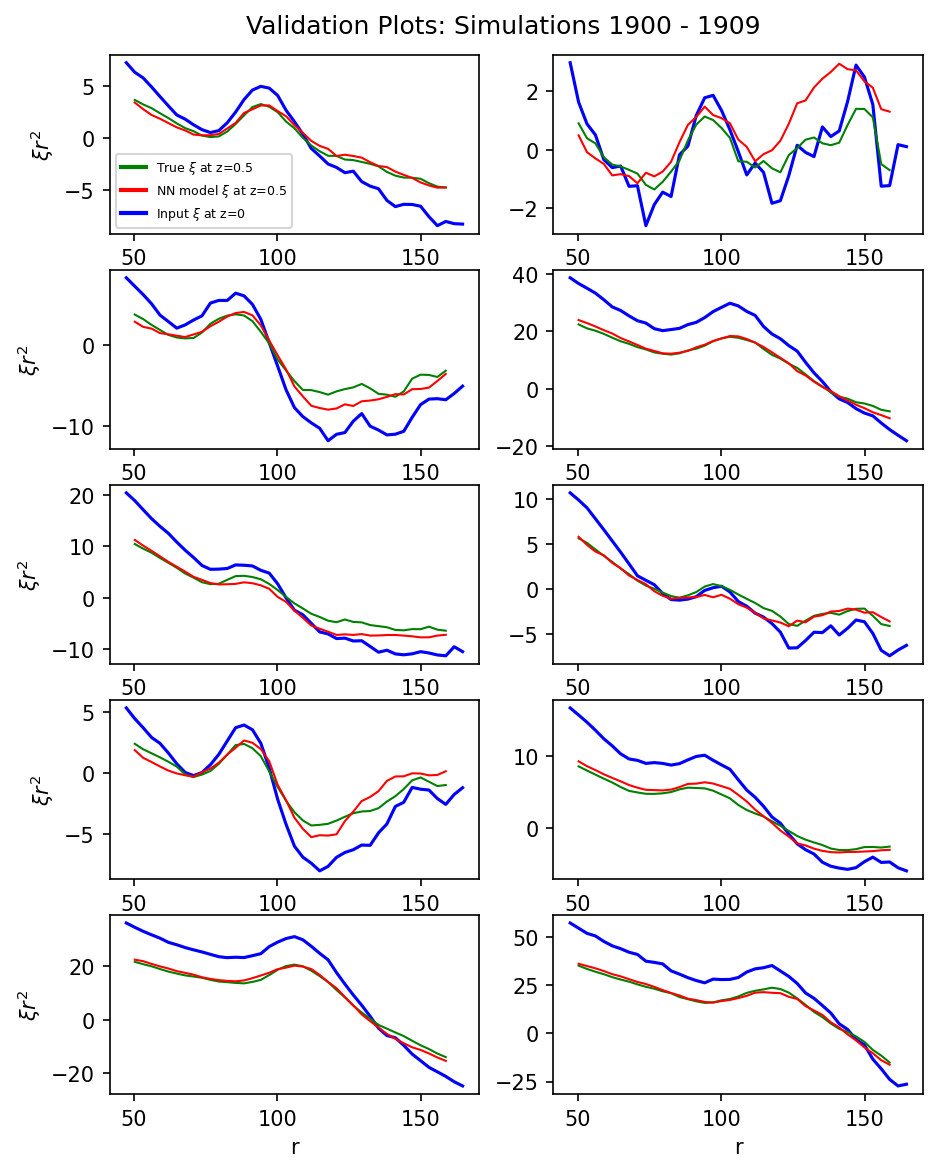

In [23]:
start_plot, end_plot = 1900, 1910

plotModel(model0_05, start_plot, end_plot, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs)

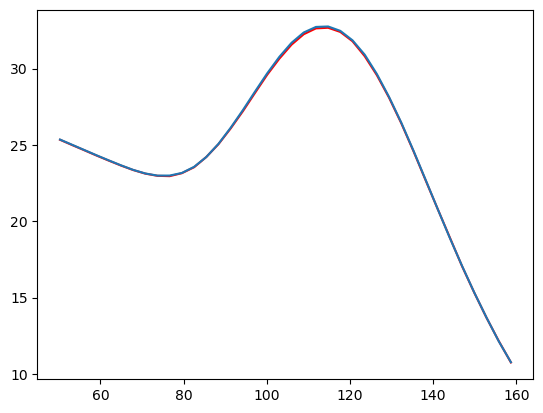

In [24]:
averageModel(model0_05, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs)

In [256]:
# save model
torch.save(model0_05.state_dict(), 'recon1/trained_weights_005model_run1.pth')

In [19]:
# load saved model
model0_05 = AE(input_shape=input_shape, output_shape=output_shape, features=nFeatures).to(device)
model0_05.load_state_dict(torch.load('recon1/trained_weights_005model_run1.pth'))
model0_05.eval()

AE(
  (input_layer): Linear(in_features=41, out_features=200, bias=True)
  (output_layer): Linear(in_features=200, out_features=38, bias=True)
)

'trained_weights_1000.pth' was trained on:
in_start, in_end = 60, 180 
out_start, out_end = 70, 170

features = 200

'trained_weights_005model_run1.pth' was trained on:
in_start, in_end = 50, 160 
out_start, out_end = 60, 150

features = 200
train/test split at 1000

'trained_weights_005model_run2.pth' was trained on:
in_start, in_end = 50, 160 
out_start, out_end = 60, 150

features = 100
train/test split at 1200

'recon1/trained_weights_005model_run2.pth' was trained on:
inputStart, inputEnd = 45, 165  outputStart, outputEnd = 50, 160

features = 100 train/test split at 1200


# Train z = 0.5 to z = 1 model next

In [23]:
zInput, zOutput = 0.5, 1
inputStart, inputEnd = 60, 150
outputStart, outputEnd = 65, 145
inputs05, outputs1 = dataPull(zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd)

In [24]:
input_shape = len(inputs05[0])
output_shape = len(outputs1[0])
nFeatures = 100

In [25]:
train_dataloader05_1, test_dataloader05_1 = setDataloaders(inputs05, outputs1)

In [26]:
## Set-up Model ##
    
# use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create model
# load it to the specified device, either gpu or cpu
model05_1 = AE(input_shape=input_shape, output_shape=output_shape, features=nFeatures).to(device)

In [49]:
model05_1, train_losses05_1, test_losses05_1 = trainBAOReconNN(model05_1, train_dataloader05_1, test_dataloader05_1, lr=1e-7, epochs=1000)

epoch : 1/1000, train loss = 0.0004004447, test loss = 0.0002124682
epoch : 2/1000, train loss = 0.0004004415, test loss = 0.0002124492
epoch : 3/1000, train loss = 0.0004004411, test loss = 0.0002124801
epoch : 4/1000, train loss = 0.0004004407, test loss = 0.0002124994
epoch : 5/1000, train loss = 0.0004004400, test loss = 0.0002125120
epoch : 6/1000, train loss = 0.0004004342, test loss = 0.0002124404
epoch : 7/1000, train loss = 0.0004004318, test loss = 0.0002124672
epoch : 8/1000, train loss = 0.0004004316, test loss = 0.0002124667
epoch : 9/1000, train loss = 0.0004004298, test loss = 0.0002124448
epoch : 10/1000, train loss = 0.0004004290, test loss = 0.0002124904
epoch : 11/1000, train loss = 0.0004004255, test loss = 0.0002124348
epoch : 12/1000, train loss = 0.0004004240, test loss = 0.0002124635
epoch : 13/1000, train loss = 0.0004004228, test loss = 0.0002124580
epoch : 14/1000, train loss = 0.0004004218, test loss = 0.0002124885
epoch : 15/1000, train loss = 0.0004004230,

epoch : 120/1000, train loss = 0.0004002994, test loss = 0.0002124070
epoch : 121/1000, train loss = 0.0004002977, test loss = 0.0002123805
epoch : 122/1000, train loss = 0.0004002992, test loss = 0.0002123471
epoch : 123/1000, train loss = 0.0004002965, test loss = 0.0002123656
epoch : 124/1000, train loss = 0.0004002949, test loss = 0.0002123720
epoch : 125/1000, train loss = 0.0004002935, test loss = 0.0002123668
epoch : 126/1000, train loss = 0.0004002933, test loss = 0.0002123668
epoch : 127/1000, train loss = 0.0004002917, test loss = 0.0002123798
epoch : 128/1000, train loss = 0.0004002897, test loss = 0.0002124133
epoch : 129/1000, train loss = 0.0004002905, test loss = 0.0002124222
epoch : 130/1000, train loss = 0.0004002890, test loss = 0.0002124197
epoch : 131/1000, train loss = 0.0004002875, test loss = 0.0002123921
epoch : 132/1000, train loss = 0.0004002861, test loss = 0.0002124043
epoch : 133/1000, train loss = 0.0004002862, test loss = 0.0002123992
epoch : 134/1000, tr

epoch : 238/1000, train loss = 0.0004001738, test loss = 0.0002123473
epoch : 239/1000, train loss = 0.0004001737, test loss = 0.0002123355
epoch : 240/1000, train loss = 0.0004001731, test loss = 0.0002123215
epoch : 241/1000, train loss = 0.0004001734, test loss = 0.0002122983
epoch : 242/1000, train loss = 0.0004001718, test loss = 0.0002123027
epoch : 243/1000, train loss = 0.0004001701, test loss = 0.0002123266
epoch : 244/1000, train loss = 0.0004001717, test loss = 0.0002122868
epoch : 245/1000, train loss = 0.0004001679, test loss = 0.0002123021
epoch : 246/1000, train loss = 0.0004001659, test loss = 0.0002122920
epoch : 247/1000, train loss = 0.0004001641, test loss = 0.0002122994
epoch : 248/1000, train loss = 0.0004001670, test loss = 0.0002122623
epoch : 249/1000, train loss = 0.0004001641, test loss = 0.0002122877
epoch : 250/1000, train loss = 0.0004001640, test loss = 0.0002122916
epoch : 251/1000, train loss = 0.0004001603, test loss = 0.0002123162
epoch : 252/1000, tr

epoch : 356/1000, train loss = 0.0004000536, test loss = 0.0002123080
epoch : 357/1000, train loss = 0.0004000533, test loss = 0.0002122858
epoch : 358/1000, train loss = 0.0004000519, test loss = 0.0002122804
epoch : 359/1000, train loss = 0.0004000513, test loss = 0.0002122970
epoch : 360/1000, train loss = 0.0004000514, test loss = 0.0002123148
epoch : 361/1000, train loss = 0.0004000490, test loss = 0.0002122988
epoch : 362/1000, train loss = 0.0004000488, test loss = 0.0002122933
epoch : 363/1000, train loss = 0.0004000484, test loss = 0.0002122811
epoch : 364/1000, train loss = 0.0004000476, test loss = 0.0002123004
epoch : 365/1000, train loss = 0.0004000464, test loss = 0.0002122880
epoch : 366/1000, train loss = 0.0004000451, test loss = 0.0002123016
epoch : 367/1000, train loss = 0.0004000453, test loss = 0.0002122899
epoch : 368/1000, train loss = 0.0004000432, test loss = 0.0002122876
epoch : 369/1000, train loss = 0.0004000426, test loss = 0.0002122851
epoch : 370/1000, tr

epoch : 474/1000, train loss = 0.0003999558, test loss = 0.0002122586
epoch : 475/1000, train loss = 0.0003999558, test loss = 0.0002122579
epoch : 476/1000, train loss = 0.0003999570, test loss = 0.0002122804
epoch : 477/1000, train loss = 0.0003999562, test loss = 0.0002122893
epoch : 478/1000, train loss = 0.0003999546, test loss = 0.0002122864
epoch : 479/1000, train loss = 0.0003999517, test loss = 0.0002122666
epoch : 480/1000, train loss = 0.0003999532, test loss = 0.0002122875
epoch : 481/1000, train loss = 0.0003999506, test loss = 0.0002122504
epoch : 482/1000, train loss = 0.0003999501, test loss = 0.0002122400
epoch : 483/1000, train loss = 0.0003999497, test loss = 0.0002122450
epoch : 484/1000, train loss = 0.0003999485, test loss = 0.0002122537
epoch : 485/1000, train loss = 0.0003999462, test loss = 0.0002122372
epoch : 486/1000, train loss = 0.0003999458, test loss = 0.0002122457
epoch : 487/1000, train loss = 0.0003999449, test loss = 0.0002122378
epoch : 488/1000, tr

epoch : 592/1000, train loss = 0.0003998729, test loss = 0.0002121575
epoch : 593/1000, train loss = 0.0003998725, test loss = 0.0002121556
epoch : 594/1000, train loss = 0.0003998711, test loss = 0.0002121546
epoch : 595/1000, train loss = 0.0003998710, test loss = 0.0002121421
epoch : 596/1000, train loss = 0.0003998714, test loss = 0.0002121309
epoch : 597/1000, train loss = 0.0003998719, test loss = 0.0002121162
epoch : 598/1000, train loss = 0.0003998691, test loss = 0.0002121338
epoch : 599/1000, train loss = 0.0003998693, test loss = 0.0002121328
epoch : 600/1000, train loss = 0.0003998674, test loss = 0.0002121488
epoch : 601/1000, train loss = 0.0003998656, test loss = 0.0002121790
epoch : 602/1000, train loss = 0.0003998644, test loss = 0.0002121783
epoch : 603/1000, train loss = 0.0003998641, test loss = 0.0002121730
epoch : 604/1000, train loss = 0.0003998634, test loss = 0.0002121940
epoch : 605/1000, train loss = 0.0003998619, test loss = 0.0002121918
epoch : 606/1000, tr

epoch : 710/1000, train loss = 0.0003997977, test loss = 0.0002121808
epoch : 711/1000, train loss = 0.0003997972, test loss = 0.0002121666
epoch : 712/1000, train loss = 0.0003997964, test loss = 0.0002121643
epoch : 713/1000, train loss = 0.0003997964, test loss = 0.0002121517
epoch : 714/1000, train loss = 0.0003997962, test loss = 0.0002121438
epoch : 715/1000, train loss = 0.0003997947, test loss = 0.0002121443
epoch : 716/1000, train loss = 0.0003997948, test loss = 0.0002121648
epoch : 717/1000, train loss = 0.0003997949, test loss = 0.0002121750
epoch : 718/1000, train loss = 0.0003997928, test loss = 0.0002121653
epoch : 719/1000, train loss = 0.0003997923, test loss = 0.0002121570
epoch : 720/1000, train loss = 0.0003997910, test loss = 0.0002121541
epoch : 721/1000, train loss = 0.0003997915, test loss = 0.0002121564
epoch : 722/1000, train loss = 0.0003997902, test loss = 0.0002121364
epoch : 723/1000, train loss = 0.0003997888, test loss = 0.0002121304
epoch : 724/1000, tr

epoch : 828/1000, train loss = 0.0003997277, test loss = 0.0002120959
epoch : 829/1000, train loss = 0.0003997280, test loss = 0.0002120836
epoch : 830/1000, train loss = 0.0003997285, test loss = 0.0002120726
epoch : 831/1000, train loss = 0.0003997260, test loss = 0.0002120915
epoch : 832/1000, train loss = 0.0003997247, test loss = 0.0002121041
epoch : 833/1000, train loss = 0.0003997244, test loss = 0.0002120955
epoch : 834/1000, train loss = 0.0003997237, test loss = 0.0002121136
epoch : 835/1000, train loss = 0.0003997233, test loss = 0.0002121114
epoch : 836/1000, train loss = 0.0003997234, test loss = 0.0002121372
epoch : 837/1000, train loss = 0.0003997240, test loss = 0.0002121384
epoch : 838/1000, train loss = 0.0003997238, test loss = 0.0002121292
epoch : 839/1000, train loss = 0.0003997215, test loss = 0.0002121068
epoch : 840/1000, train loss = 0.0003997215, test loss = 0.0002121265
epoch : 841/1000, train loss = 0.0003997200, test loss = 0.0002120888
epoch : 842/1000, tr

epoch : 946/1000, train loss = 0.0003996553, test loss = 0.0002121206
epoch : 947/1000, train loss = 0.0003996547, test loss = 0.0002121079
epoch : 948/1000, train loss = 0.0003996546, test loss = 0.0002121419
epoch : 949/1000, train loss = 0.0003996541, test loss = 0.0002121405
epoch : 950/1000, train loss = 0.0003996529, test loss = 0.0002121172
epoch : 951/1000, train loss = 0.0003996524, test loss = 0.0002121120
epoch : 952/1000, train loss = 0.0003996517, test loss = 0.0002121079
epoch : 953/1000, train loss = 0.0003996511, test loss = 0.0002121184
epoch : 954/1000, train loss = 0.0003996525, test loss = 0.0002120893
epoch : 955/1000, train loss = 0.0003996522, test loss = 0.0002120710
epoch : 956/1000, train loss = 0.0003996492, test loss = 0.0002121189
epoch : 957/1000, train loss = 0.0003996487, test loss = 0.0002120995
epoch : 958/1000, train loss = 0.0003996481, test loss = 0.0002120865
epoch : 959/1000, train loss = 0.0003996486, test loss = 0.0002121109
epoch : 960/1000, tr

In [50]:
mean_inputs, mean_outputs, var_inputs, var_outputs = meanVar(inputs05, outputs1)

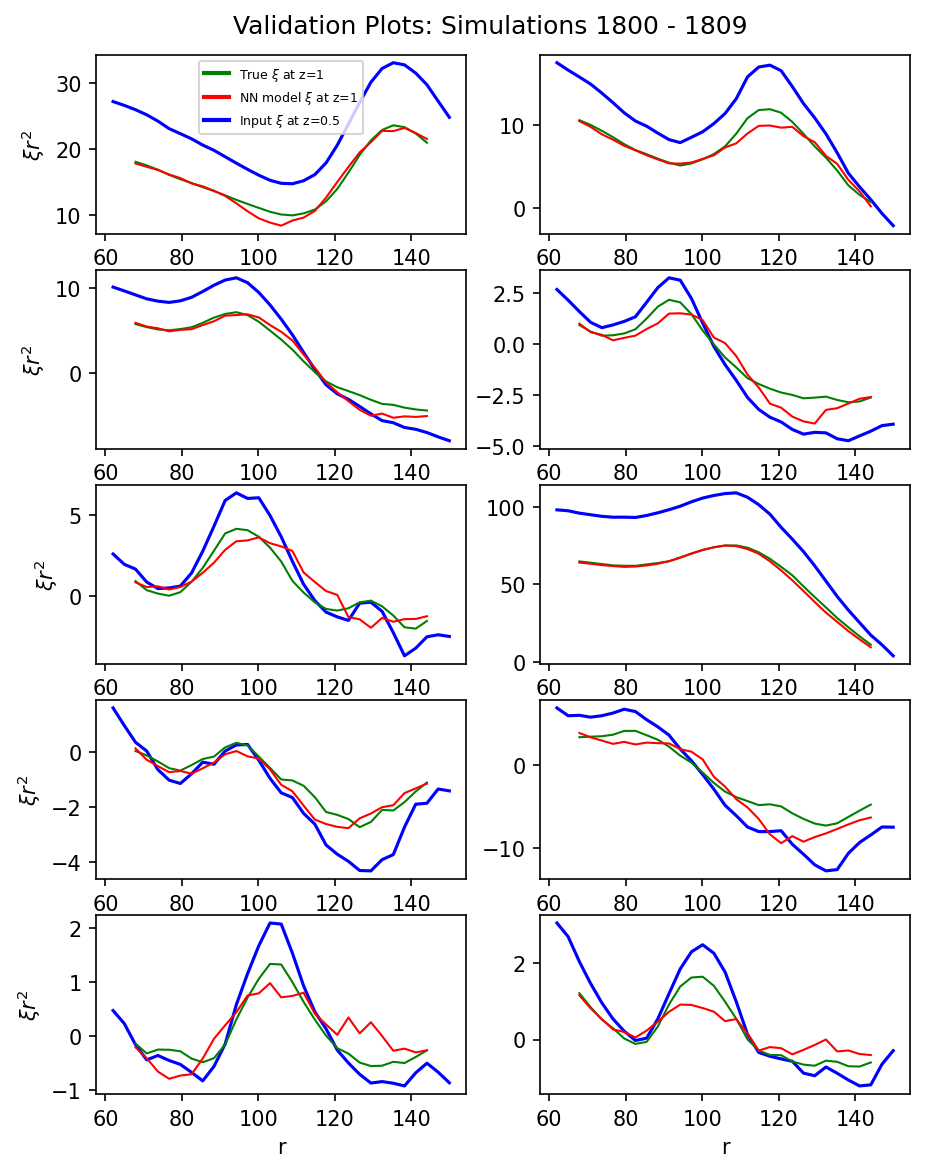

In [52]:
start_plot, end_plot = 1800, 1810

plotModel(model05_1, start_plot, end_plot, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs)

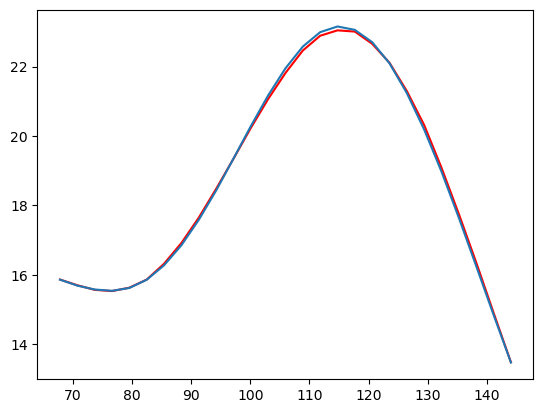

In [53]:
averageModel(model05_1, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs)

In [54]:
# save model
torch.save(model05_1.state_dict(), 'trained_weights_051model_run1.pth')

In [27]:
# load saved model
model_load05_1 = AE(input_shape=input_shape, output_shape=output_shape, features=nFeatures).to(device)
model_load05_1.load_state_dict(torch.load('trained_weights_051model_run1.pth'))
model_load05_1.eval()

AE(
  (input_layer): Linear(in_features=31, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=27, bias=True)
)

'trained_weights_051model_run1.pth' was trained on:
in_start, in_end = 60, 150 
out_start, out_end = 65, 145

features = 100
train/test split at 1200

# Train z = 1 to z = 2 model next

In [70]:
zInput, zOutput = 1, 2
inputStart, inputEnd = 65, 145
outputStart, outputEnd = 70, 140
inputs1, outputs2 = dataPull(zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd)

In [71]:
input_shape = len(inputs1[0])
output_shape = len(outputs2[0])
nFeatures = 100

In [72]:
train_dataloader1_2, test_dataloader1_2 = setDataloaders(inputs1, outputs2)

In [73]:
## Set-up Model ##
    
# use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create model
# load it to the specified device, either gpu or cpu
model1_2 = AE(input_shape=input_shape, output_shape=output_shape, features=nFeatures).to(device)

In [35]:
model1_2, train_losses1_2, test_losses1_2 = trainBAOReconNN(model1_2, train_dataloader1_2, test_dataloader1_2, lr=1e-7, epochs=500)

epoch : 1/500, train loss = 0.0013775594, test loss = 0.0007444525
epoch : 2/500, train loss = 0.0013774861, test loss = 0.0007445410
epoch : 3/500, train loss = 0.0013774643, test loss = 0.0007444542
epoch : 4/500, train loss = 0.0013774414, test loss = 0.0007444951
epoch : 5/500, train loss = 0.0013774396, test loss = 0.0007444648
epoch : 6/500, train loss = 0.0013774317, test loss = 0.0007444554
epoch : 7/500, train loss = 0.0013774260, test loss = 0.0007444935
epoch : 8/500, train loss = 0.0013774065, test loss = 0.0007446403
epoch : 9/500, train loss = 0.0013774105, test loss = 0.0007445471
epoch : 10/500, train loss = 0.0013773976, test loss = 0.0007444077
epoch : 11/500, train loss = 0.0013774128, test loss = 0.0007445965
epoch : 12/500, train loss = 0.0013773923, test loss = 0.0007446744
epoch : 13/500, train loss = 0.0013773817, test loss = 0.0007444322
epoch : 14/500, train loss = 0.0013773740, test loss = 0.0007443790
epoch : 15/500, train loss = 0.0013773869, test loss = 0.

epoch : 122/500, train loss = 0.0013768606, test loss = 0.0007442734
epoch : 123/500, train loss = 0.0013768524, test loss = 0.0007442800
epoch : 124/500, train loss = 0.0013768440, test loss = 0.0007443284
epoch : 125/500, train loss = 0.0013768394, test loss = 0.0007442214
epoch : 126/500, train loss = 0.0013768423, test loss = 0.0007443136
epoch : 127/500, train loss = 0.0013768320, test loss = 0.0007444221
epoch : 128/500, train loss = 0.0013768376, test loss = 0.0007443549
epoch : 129/500, train loss = 0.0013768236, test loss = 0.0007443099
epoch : 130/500, train loss = 0.0013768190, test loss = 0.0007443441
epoch : 131/500, train loss = 0.0013768230, test loss = 0.0007442797
epoch : 132/500, train loss = 0.0013768149, test loss = 0.0007444489
epoch : 133/500, train loss = 0.0013768060, test loss = 0.0007443848
epoch : 134/500, train loss = 0.0013767987, test loss = 0.0007443462
epoch : 135/500, train loss = 0.0013767982, test loss = 0.0007442627
epoch : 136/500, train loss = 0.00

epoch : 241/500, train loss = 0.0013764248, test loss = 0.0007442507
epoch : 242/500, train loss = 0.0013764225, test loss = 0.0007441891
epoch : 243/500, train loss = 0.0013764204, test loss = 0.0007441950
epoch : 244/500, train loss = 0.0013764173, test loss = 0.0007441332
epoch : 245/500, train loss = 0.0013764129, test loss = 0.0007442368
epoch : 246/500, train loss = 0.0013764123, test loss = 0.0007442525
epoch : 247/500, train loss = 0.0013764082, test loss = 0.0007442097
epoch : 248/500, train loss = 0.0013764104, test loss = 0.0007440254
epoch : 249/500, train loss = 0.0013764031, test loss = 0.0007440954
epoch : 250/500, train loss = 0.0013764016, test loss = 0.0007442079
epoch : 251/500, train loss = 0.0013763999, test loss = 0.0007441535
epoch : 252/500, train loss = 0.0013763978, test loss = 0.0007441060
epoch : 253/500, train loss = 0.0013763934, test loss = 0.0007441840
epoch : 254/500, train loss = 0.0013763905, test loss = 0.0007441766
epoch : 255/500, train loss = 0.00

epoch : 360/500, train loss = 0.0013760706, test loss = 0.0007440352
epoch : 361/500, train loss = 0.0013760692, test loss = 0.0007441097
epoch : 362/500, train loss = 0.0013760672, test loss = 0.0007440841
epoch : 363/500, train loss = 0.0013760610, test loss = 0.0007440698
epoch : 364/500, train loss = 0.0013760601, test loss = 0.0007440248
epoch : 365/500, train loss = 0.0013760590, test loss = 0.0007440796
epoch : 366/500, train loss = 0.0013760576, test loss = 0.0007441064
epoch : 367/500, train loss = 0.0013760502, test loss = 0.0007440664
epoch : 368/500, train loss = 0.0013760453, test loss = 0.0007440201
epoch : 369/500, train loss = 0.0013760425, test loss = 0.0007439691
epoch : 370/500, train loss = 0.0013760425, test loss = 0.0007438843
epoch : 371/500, train loss = 0.0013760367, test loss = 0.0007439471
epoch : 372/500, train loss = 0.0013760351, test loss = 0.0007439714
epoch : 373/500, train loss = 0.0013760308, test loss = 0.0007439941
epoch : 374/500, train loss = 0.00

epoch : 479/500, train loss = 0.0013757286, test loss = 0.0007438852
epoch : 480/500, train loss = 0.0013757279, test loss = 0.0007438759
epoch : 481/500, train loss = 0.0013757215, test loss = 0.0007439073
epoch : 482/500, train loss = 0.0013757207, test loss = 0.0007439136
epoch : 483/500, train loss = 0.0013757172, test loss = 0.0007438985
epoch : 484/500, train loss = 0.0013757193, test loss = 0.0007439514
epoch : 485/500, train loss = 0.0013757124, test loss = 0.0007438561
epoch : 486/500, train loss = 0.0013757109, test loss = 0.0007438784
epoch : 487/500, train loss = 0.0013757122, test loss = 0.0007439528
epoch : 488/500, train loss = 0.0013757068, test loss = 0.0007439090
epoch : 489/500, train loss = 0.0013757031, test loss = 0.0007438435
epoch : 490/500, train loss = 0.0013757022, test loss = 0.0007438455
epoch : 491/500, train loss = 0.0013756995, test loss = 0.0007438081
epoch : 492/500, train loss = 0.0013756950, test loss = 0.0007438152
epoch : 493/500, train loss = 0.00

In [36]:
mean_inputs, mean_outputs, var_inputs, var_outputs = meanVar(inputs1, outputs2)

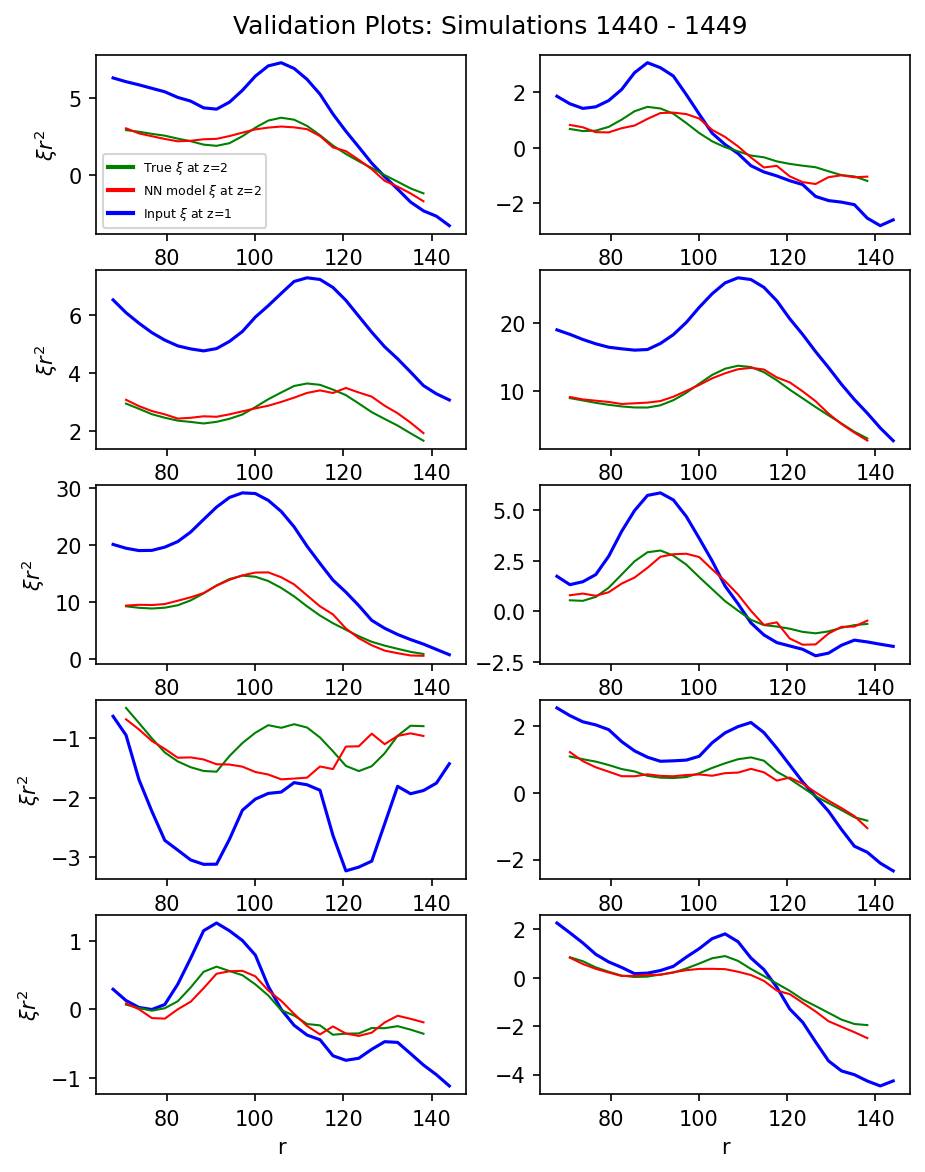

In [37]:
start_plot, end_plot = 1440, 1450

plotModel(model1_2, start_plot, end_plot, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs)

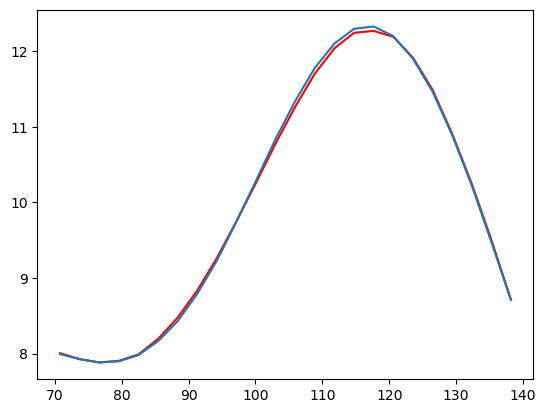

In [38]:
averageModel(model1_2, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs)

In [76]:
# save model
torch.save(model1_2.state_dict(), 'trained_weights_12model_run1.pth')

In [74]:
# load saved model
model_load1_2 = AE(input_shape=input_shape, output_shape=output_shape, features=nFeatures).to(device)
model_load1_2.load_state_dict(torch.load('trained_weights_12model_run1.pth'))
model_load1_2.eval()

AE(
  (input_layer): Linear(in_features=27, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=24, bias=True)
)

'trained_weights_12model_run1.pth' was trained on:
in_start, in_end = 65, 145
out_start, out_end = 70, 140

features = 100
train/test split at 1200

# Train z = 2 to z = 3 model next

In [75]:
zInput, zOutput = 2, 3
inputStart, inputEnd = 70, 140
outputStart, outputEnd = 75, 135
inputs2, outputs3 = dataPull(zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd)

In [76]:
input_shape = len(inputs2[0])
output_shape = len(outputs3[0])
nFeatures = 100

In [77]:
train_dataloader2_3, test_dataloader2_3 = setDataloaders(inputs2, outputs3)

In [78]:
## Set-up Model ##
    
# use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create model
# load it to the specified device, either gpu or cpu
model2_3 = AE(input_shape=input_shape, output_shape=output_shape, features=nFeatures).to(device)

In [53]:
model2_3, train_losses2_3, test_losses2_3 = trainBAOReconNN(model2_3, train_dataloader2_3, test_dataloader2_3, lr=5e-7, epochs=1000)

epoch : 1/1000, train loss = 0.0025488698, test loss = 0.0015091104
epoch : 2/1000, train loss = 0.0025486707, test loss = 0.0015081511
epoch : 3/1000, train loss = 0.0025483893, test loss = 0.0015093704
epoch : 4/1000, train loss = 0.0025478801, test loss = 0.0015075583
epoch : 5/1000, train loss = 0.0025473740, test loss = 0.0015077993
epoch : 6/1000, train loss = 0.0025470045, test loss = 0.0015097612
epoch : 7/1000, train loss = 0.0025463725, test loss = 0.0015070698
epoch : 8/1000, train loss = 0.0025459469, test loss = 0.0015068230
epoch : 9/1000, train loss = 0.0025457033, test loss = 0.0015088502
epoch : 10/1000, train loss = 0.0025452994, test loss = 0.0015084439
epoch : 11/1000, train loss = 0.0025451294, test loss = 0.0015071622
epoch : 12/1000, train loss = 0.0025446377, test loss = 0.0015054219
epoch : 13/1000, train loss = 0.0025441330, test loss = 0.0015074538
epoch : 14/1000, train loss = 0.0025440457, test loss = 0.0015059952
epoch : 15/1000, train loss = 0.0025432570,

epoch : 120/1000, train loss = 0.0025112650, test loss = 0.0014890531
epoch : 121/1000, train loss = 0.0025110118, test loss = 0.0014889528
epoch : 122/1000, train loss = 0.0025107460, test loss = 0.0014887309
epoch : 123/1000, train loss = 0.0025104351, test loss = 0.0014877282
epoch : 124/1000, train loss = 0.0025100645, test loss = 0.0014877127
epoch : 125/1000, train loss = 0.0025098107, test loss = 0.0014875784
epoch : 126/1000, train loss = 0.0025096592, test loss = 0.0014872665
epoch : 127/1000, train loss = 0.0025092257, test loss = 0.0014878420
epoch : 128/1000, train loss = 0.0025090845, test loss = 0.0014879077
epoch : 129/1000, train loss = 0.0025087376, test loss = 0.0014879603
epoch : 130/1000, train loss = 0.0025085606, test loss = 0.0014875162
epoch : 131/1000, train loss = 0.0025082421, test loss = 0.0014871592
epoch : 132/1000, train loss = 0.0025079401, test loss = 0.0014865401
epoch : 133/1000, train loss = 0.0025076843, test loss = 0.0014876112
epoch : 134/1000, tr

epoch : 238/1000, train loss = 0.0024820146, test loss = 0.0014731941
epoch : 239/1000, train loss = 0.0024818963, test loss = 0.0014738868
epoch : 240/1000, train loss = 0.0024816251, test loss = 0.0014737447
epoch : 241/1000, train loss = 0.0024815296, test loss = 0.0014739362
epoch : 242/1000, train loss = 0.0024811512, test loss = 0.0014715564
epoch : 243/1000, train loss = 0.0024807854, test loss = 0.0014722637
epoch : 244/1000, train loss = 0.0024805172, test loss = 0.0014723552
epoch : 245/1000, train loss = 0.0024803133, test loss = 0.0014707881
epoch : 246/1000, train loss = 0.0024801237, test loss = 0.0014713347
epoch : 247/1000, train loss = 0.0024798086, test loss = 0.0014713482
epoch : 248/1000, train loss = 0.0024795366, test loss = 0.0014720788
epoch : 249/1000, train loss = 0.0024791969, test loss = 0.0014717569
epoch : 250/1000, train loss = 0.0024789450, test loss = 0.0014702613
epoch : 251/1000, train loss = 0.0024787736, test loss = 0.0014701053
epoch : 252/1000, tr

epoch : 356/1000, train loss = 0.0024559229, test loss = 0.0014586500
epoch : 357/1000, train loss = 0.0024557035, test loss = 0.0014591460
epoch : 358/1000, train loss = 0.0024556242, test loss = 0.0014590442
epoch : 359/1000, train loss = 0.0024552679, test loss = 0.0014581371
epoch : 360/1000, train loss = 0.0024550372, test loss = 0.0014570970
epoch : 361/1000, train loss = 0.0024548659, test loss = 0.0014585071
epoch : 362/1000, train loss = 0.0024546160, test loss = 0.0014584475
epoch : 363/1000, train loss = 0.0024543913, test loss = 0.0014584638
epoch : 364/1000, train loss = 0.0024542241, test loss = 0.0014580565
epoch : 365/1000, train loss = 0.0024540034, test loss = 0.0014581848
epoch : 366/1000, train loss = 0.0024538092, test loss = 0.0014576438
epoch : 367/1000, train loss = 0.0024536644, test loss = 0.0014568868
epoch : 368/1000, train loss = 0.0024532682, test loss = 0.0014574281
epoch : 369/1000, train loss = 0.0024530572, test loss = 0.0014569085
epoch : 370/1000, tr

epoch : 474/1000, train loss = 0.0024332431, test loss = 0.0014457790
epoch : 475/1000, train loss = 0.0024329801, test loss = 0.0014460888
epoch : 476/1000, train loss = 0.0024328655, test loss = 0.0014449182
epoch : 477/1000, train loss = 0.0024326307, test loss = 0.0014462422
epoch : 478/1000, train loss = 0.0024324257, test loss = 0.0014451404
epoch : 479/1000, train loss = 0.0024322422, test loss = 0.0014459969
epoch : 480/1000, train loss = 0.0024321257, test loss = 0.0014458762
epoch : 481/1000, train loss = 0.0024319662, test loss = 0.0014451543
epoch : 482/1000, train loss = 0.0024317175, test loss = 0.0014452423
epoch : 483/1000, train loss = 0.0024315734, test loss = 0.0014448112
epoch : 484/1000, train loss = 0.0024314457, test loss = 0.0014450624
epoch : 485/1000, train loss = 0.0024312332, test loss = 0.0014453216
epoch : 486/1000, train loss = 0.0024310924, test loss = 0.0014449642
epoch : 487/1000, train loss = 0.0024309521, test loss = 0.0014443045
epoch : 488/1000, tr

epoch : 592/1000, train loss = 0.0024123881, test loss = 0.0014345506
epoch : 593/1000, train loss = 0.0024122149, test loss = 0.0014344492
epoch : 594/1000, train loss = 0.0024121158, test loss = 0.0014349894
epoch : 595/1000, train loss = 0.0024119584, test loss = 0.0014337429
epoch : 596/1000, train loss = 0.0024117746, test loss = 0.0014337353
epoch : 597/1000, train loss = 0.0024116266, test loss = 0.0014339258
epoch : 598/1000, train loss = 0.0024114846, test loss = 0.0014337002
epoch : 599/1000, train loss = 0.0024113590, test loss = 0.0014342862
epoch : 600/1000, train loss = 0.0024112384, test loss = 0.0014334459
epoch : 601/1000, train loss = 0.0024110675, test loss = 0.0014339563
epoch : 602/1000, train loss = 0.0024109469, test loss = 0.0014328531
epoch : 603/1000, train loss = 0.0024107762, test loss = 0.0014339128
epoch : 604/1000, train loss = 0.0024106770, test loss = 0.0014330583
epoch : 605/1000, train loss = 0.0024105229, test loss = 0.0014334162
epoch : 606/1000, tr

epoch : 710/1000, train loss = 0.0023959101, test loss = 0.0014255036
epoch : 711/1000, train loss = 0.0023957655, test loss = 0.0014250748
epoch : 712/1000, train loss = 0.0023956495, test loss = 0.0014250687
epoch : 713/1000, train loss = 0.0023955535, test loss = 0.0014247658
epoch : 714/1000, train loss = 0.0023954676, test loss = 0.0014260565
epoch : 715/1000, train loss = 0.0023952711, test loss = 0.0014245357
epoch : 716/1000, train loss = 0.0023951830, test loss = 0.0014245825
epoch : 717/1000, train loss = 0.0023950678, test loss = 0.0014252800
epoch : 718/1000, train loss = 0.0023949709, test loss = 0.0014244009
epoch : 719/1000, train loss = 0.0023947333, test loss = 0.0014252484
epoch : 720/1000, train loss = 0.0023945296, test loss = 0.0014242629
epoch : 721/1000, train loss = 0.0023943559, test loss = 0.0014249896
epoch : 722/1000, train loss = 0.0023942463, test loss = 0.0014245345
epoch : 723/1000, train loss = 0.0023940192, test loss = 0.0014241376
epoch : 724/1000, tr

epoch : 828/1000, train loss = 0.0023804905, test loss = 0.0014172275
epoch : 829/1000, train loss = 0.0023803570, test loss = 0.0014171612
epoch : 830/1000, train loss = 0.0023802642, test loss = 0.0014175500
epoch : 831/1000, train loss = 0.0023801352, test loss = 0.0014167304
epoch : 832/1000, train loss = 0.0023800015, test loss = 0.0014165041
epoch : 833/1000, train loss = 0.0023799365, test loss = 0.0014170779
epoch : 834/1000, train loss = 0.0023798604, test loss = 0.0014163650
epoch : 835/1000, train loss = 0.0023797636, test loss = 0.0014174971
epoch : 836/1000, train loss = 0.0023796084, test loss = 0.0014162532
epoch : 837/1000, train loss = 0.0023794826, test loss = 0.0014161162
epoch : 838/1000, train loss = 0.0023794037, test loss = 0.0014163016
epoch : 839/1000, train loss = 0.0023792893, test loss = 0.0014164796
epoch : 840/1000, train loss = 0.0023791980, test loss = 0.0014165626
epoch : 841/1000, train loss = 0.0023790759, test loss = 0.0014163848
epoch : 842/1000, tr

epoch : 946/1000, train loss = 0.0023675444, test loss = 0.0014081428
epoch : 947/1000, train loss = 0.0023673195, test loss = 0.0014093149
epoch : 948/1000, train loss = 0.0023672347, test loss = 0.0014099198
epoch : 949/1000, train loss = 0.0023671386, test loss = 0.0014092982
epoch : 950/1000, train loss = 0.0023670857, test loss = 0.0014084519
epoch : 951/1000, train loss = 0.0023669463, test loss = 0.0014091300
epoch : 952/1000, train loss = 0.0023668829, test loss = 0.0014090744
epoch : 953/1000, train loss = 0.0023667673, test loss = 0.0014093961
epoch : 954/1000, train loss = 0.0023668209, test loss = 0.0014099012
epoch : 955/1000, train loss = 0.0023666212, test loss = 0.0014097407
epoch : 956/1000, train loss = 0.0023665177, test loss = 0.0014092690
epoch : 957/1000, train loss = 0.0023664464, test loss = 0.0014092546
epoch : 958/1000, train loss = 0.0023663602, test loss = 0.0014091645
epoch : 959/1000, train loss = 0.0023662535, test loss = 0.0014092226
epoch : 960/1000, tr

In [49]:
mean_inputs, mean_outputs, var_inputs, var_outputs = meanVar(inputs2, outputs3)

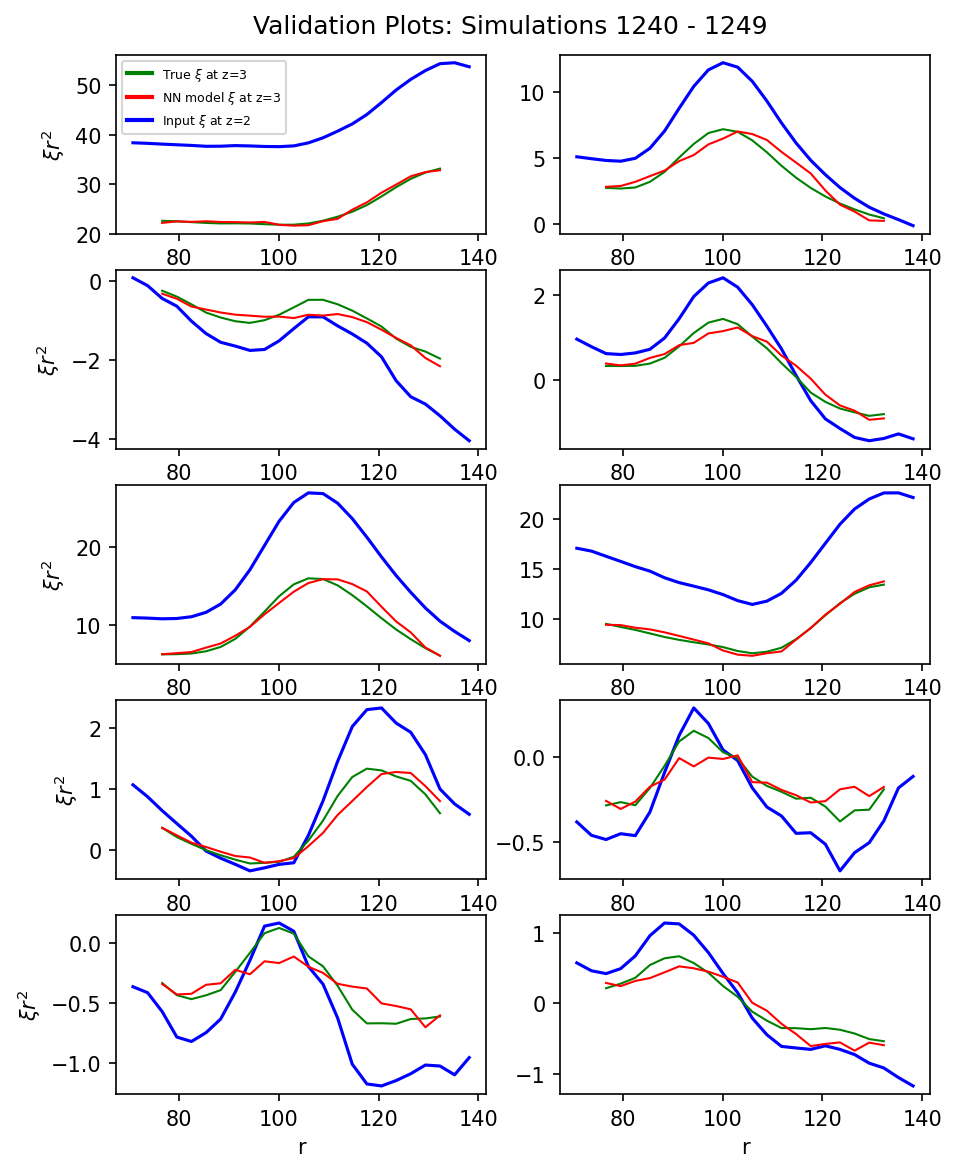

In [50]:
start_plot, end_plot = 1240, 1250

plotModel(model2_3, start_plot, end_plot, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs)

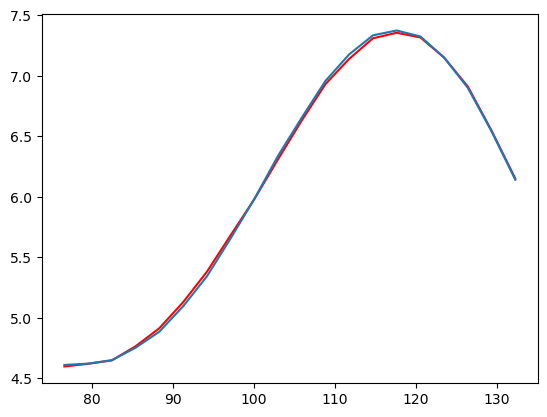

In [51]:
averageModel(model2_3, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs)

In [54]:
# save model
torch.save(model2_3.state_dict(), 'trained_weights_23model_run1.pth')

In [79]:
# load saved model
model_load2_3 = AE(input_shape=input_shape, output_shape=output_shape, features=nFeatures).to(device)
model_load2_3.load_state_dict(torch.load('trained_weights_23model_run1.pth'))
model_load2_3.eval()

AE(
  (input_layer): Linear(in_features=24, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=20, bias=True)
)

'trained_weights_23model_run1.pth' was trained on:
in_start, in_end = 70, 140
out_start, out_end = 75, 135

features = 100
train/test split at 1200

# Finally train z = 0 to 3 model for comparison

In [80]:
zInput, zOutput = 0, 3
inputStart, inputEnd = 50, 160
outputStart, outputEnd = 75, 135
inputs0Full, outputs3Full = dataPull(zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd)

In [81]:
input_shape = len(inputs0Full[0])
output_shape = len(outputs3Full[0])
nFeatures = 100

In [82]:
train_dataloader0_3, test_dataloader0_3 = setDataloaders(inputs0Full, outputs3Full)

In [83]:
## Set-up Model ##
    
# use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create model
# load it to the specified device, either gpu or cpu
model0_3 = AE(input_shape=input_shape, output_shape=output_shape, features=nFeatures).to(device)

In [37]:
model0_3, train_losses0_3, test_losses0_3 = trainBAOReconNN(model0_3, train_dataloader0_3, test_dataloader0_3, lr=1e-7, epochs=500)

epoch : 1/500, train loss = 0.0390510154, test loss = 0.0190546334
epoch : 2/500, train loss = 0.0390507480, test loss = 0.0190542396
epoch : 3/500, train loss = 0.0390504437, test loss = 0.0190542338
epoch : 4/500, train loss = 0.0390502066, test loss = 0.0190542328
epoch : 5/500, train loss = 0.0390499646, test loss = 0.0190544861
epoch : 6/500, train loss = 0.0390496862, test loss = 0.0190542704
epoch : 7/500, train loss = 0.0390495193, test loss = 0.0190541917
epoch : 8/500, train loss = 0.0390492852, test loss = 0.0190541938
epoch : 9/500, train loss = 0.0390490953, test loss = 0.0190542654
epoch : 10/500, train loss = 0.0390489081, test loss = 0.0190542862
epoch : 11/500, train loss = 0.0390487148, test loss = 0.0190541327
epoch : 12/500, train loss = 0.0390485372, test loss = 0.0190539546
epoch : 13/500, train loss = 0.0390483426, test loss = 0.0190537077
epoch : 14/500, train loss = 0.0390481961, test loss = 0.0190537275
epoch : 15/500, train loss = 0.0390480976, test loss = 0.

epoch : 122/500, train loss = 0.0390301625, test loss = 0.0190469752
epoch : 123/500, train loss = 0.0390300437, test loss = 0.0190466634
epoch : 124/500, train loss = 0.0390298850, test loss = 0.0190465633
epoch : 125/500, train loss = 0.0390297160, test loss = 0.0190468034
epoch : 126/500, train loss = 0.0390295851, test loss = 0.0190464554
epoch : 127/500, train loss = 0.0390294057, test loss = 0.0190465217
epoch : 128/500, train loss = 0.0390293246, test loss = 0.0190467679
epoch : 129/500, train loss = 0.0390291422, test loss = 0.0190464961
epoch : 130/500, train loss = 0.0390289924, test loss = 0.0190465461
epoch : 131/500, train loss = 0.0390288592, test loss = 0.0190462222
epoch : 132/500, train loss = 0.0390286898, test loss = 0.0190461625
epoch : 133/500, train loss = 0.0390285906, test loss = 0.0190463455
epoch : 134/500, train loss = 0.0390284437, test loss = 0.0190464754
epoch : 135/500, train loss = 0.0390282983, test loss = 0.0190458795
epoch : 136/500, train loss = 0.03

epoch : 241/500, train loss = 0.0390140520, test loss = 0.0190393587
epoch : 242/500, train loss = 0.0390139786, test loss = 0.0190391295
epoch : 243/500, train loss = 0.0390138298, test loss = 0.0190388860
epoch : 244/500, train loss = 0.0390137483, test loss = 0.0190391279
epoch : 245/500, train loss = 0.0390136420, test loss = 0.0190390318
epoch : 246/500, train loss = 0.0390135131, test loss = 0.0190387678
epoch : 247/500, train loss = 0.0390134359, test loss = 0.0190386997
epoch : 248/500, train loss = 0.0390133061, test loss = 0.0190385445
epoch : 249/500, train loss = 0.0390132470, test loss = 0.0190386027
epoch : 250/500, train loss = 0.0390130762, test loss = 0.0190385521
epoch : 251/500, train loss = 0.0390129844, test loss = 0.0190387986
epoch : 252/500, train loss = 0.0390128783, test loss = 0.0190384741
epoch : 253/500, train loss = 0.0390127613, test loss = 0.0190386231
epoch : 254/500, train loss = 0.0390126486, test loss = 0.0190385728
epoch : 255/500, train loss = 0.03

epoch : 360/500, train loss = 0.0389988166, test loss = 0.0190328788
epoch : 361/500, train loss = 0.0389987126, test loss = 0.0190328451
epoch : 362/500, train loss = 0.0389986166, test loss = 0.0190327350
epoch : 363/500, train loss = 0.0389985102, test loss = 0.0190328040
epoch : 364/500, train loss = 0.0389984178, test loss = 0.0190324988
epoch : 365/500, train loss = 0.0389982851, test loss = 0.0190326872
epoch : 366/500, train loss = 0.0389981650, test loss = 0.0190325166
epoch : 367/500, train loss = 0.0389981166, test loss = 0.0190324796
epoch : 368/500, train loss = 0.0389979952, test loss = 0.0190323241
epoch : 369/500, train loss = 0.0389978935, test loss = 0.0190325015
epoch : 370/500, train loss = 0.0389977465, test loss = 0.0190322277
epoch : 371/500, train loss = 0.0389976655, test loss = 0.0190323027
epoch : 372/500, train loss = 0.0389975660, test loss = 0.0190324625
epoch : 373/500, train loss = 0.0389974491, test loss = 0.0190320019
epoch : 374/500, train loss = 0.03

epoch : 479/500, train loss = 0.0389844208, test loss = 0.0190265884
epoch : 480/500, train loss = 0.0389843066, test loss = 0.0190265263
epoch : 481/500, train loss = 0.0389841968, test loss = 0.0190262116
epoch : 482/500, train loss = 0.0389840735, test loss = 0.0190266425
epoch : 483/500, train loss = 0.0389839613, test loss = 0.0190264002
epoch : 484/500, train loss = 0.0389838603, test loss = 0.0190264444
epoch : 485/500, train loss = 0.0389837400, test loss = 0.0190264792
epoch : 486/500, train loss = 0.0389836386, test loss = 0.0190262979
epoch : 487/500, train loss = 0.0389835439, test loss = 0.0190264218
epoch : 488/500, train loss = 0.0389834729, test loss = 0.0190262941
epoch : 489/500, train loss = 0.0389833577, test loss = 0.0190261852
epoch : 490/500, train loss = 0.0389832303, test loss = 0.0190260463
epoch : 491/500, train loss = 0.0389831237, test loss = 0.0190259920
epoch : 492/500, train loss = 0.0389829561, test loss = 0.0190259697
epoch : 493/500, train loss = 0.03

In [38]:
mean_inputs, mean_outputs, var_inputs, var_outputs = meanVar(inputs0Full, outputs3Full)

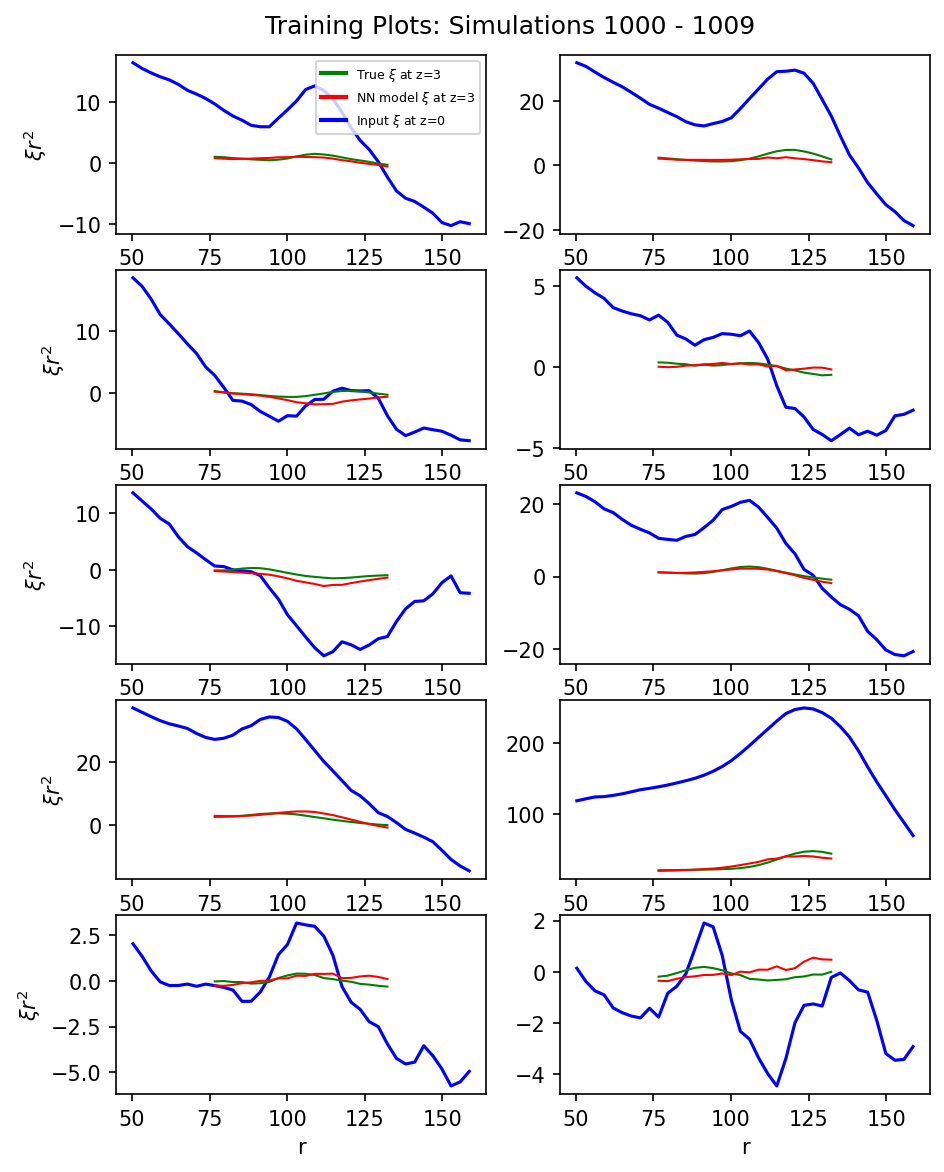

In [39]:
start_plot, end_plot = 1000, 1010

plotModel(model0_3, start_plot, end_plot, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs)

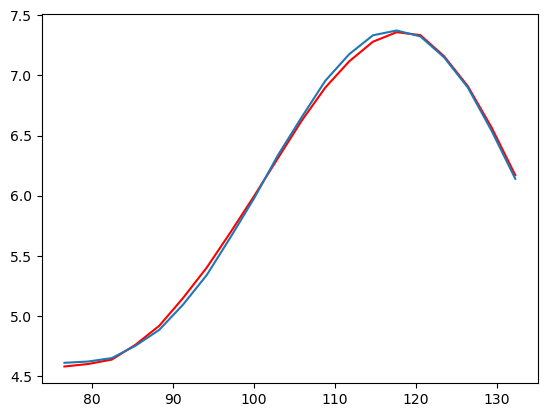

In [40]:
averageModel(model0_3, zInput, zOutput, inputStart, inputEnd, outputStart, outputEnd, mean_inputs, mean_outputs, var_inputs, var_outputs)

In [41]:
# save model
torch.save(model0_3.state_dict(), 'trained_weights_03model_run1.pth')

In [84]:
# load saved model
model_load = AE(input_shape=input_shape, output_shape=output_shape, features=nFeatures).to(device)
model_load.load_state_dict(torch.load('trained_weights_03model_run1.pth'))
model_load.eval()

AE(
  (input_layer): Linear(in_features=38, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=20, bias=True)
)

'trained_weights_03model_run1.pth' was trained on:
in_start, in_end = 50, 160
out_start, out_end = 75, 135

features = 100
train/test split at 1200

In [46]:
mean_inputs0, mean_outputs05, var_inputs0, var_outputs05 = meanVar(inputs0, outputs05)
mean_inputs05, mean_outputs1, var_inputs05, var_outputs1 = meanVar(inputs05, outputs1)
mean_inputs1, mean_outputs2, var_inputs1, var_outputs2 = meanVar(inputs1, outputs2)
mean_inputs2, mean_outputs3, var_inputs2, var_outputs3 = meanVar(inputs2, outputs3)
mean_inputsFull, mean_outputsFull, var_inputsFull, var_outputsFull = meanVar(inputs0Full, outputs3Full)

In [45]:
inputStart0, inputEnd0 = 50, 160
outputStart0, outputEnd0 = 75, 135


In [51]:
inputTable05 = txt_to_table(x, 0.5)
inputTable1 = txt_to_table(x, 1)
inputTable2 = txt_to_table(x, 2)


inputTable05 = binCorr(inputTable05, nBins)
inputTable1 = binCorr(inputTable1, nBins)
inputTable2 = binCorr(inputTable2, nBins)


inputTable05 = inputTable05[(inputTable05['r'] >= 60) & (inputTable05['r'] <= 150)]
inputTable1 = inputTable1[(inputTable1['r'] >= 65) & (inputTable1['r'] <= 145)]
inputTable2 = inputTable2[(inputTable2['r'] >= 70) & (inputTable2['r'] <= 140)]


In [89]:
inputTable = txt_to_table(x, 0)
outputTable = txt_to_table(x, 3)

inputTable = binCorr(inputTable, nBins)
outputTable = binCorr(outputTable, nBins)
        
inputTable = inputTable[(inputTable['r'] <= inputEnd0) & (inputTable['r'] >= inputStart0)]
outputTable = outputTable[(outputTable['r'] <= outputEnd0) & (outputTable['r'] >= outputStart0)]
        
            
input_xi = inputTable['xi']*inputTable['r']**2
true_xi = outputTable['xi']*outputTable['r']**2
model_xi05 = model_load0_05(torch.Tensor((inputTable['xi']*inputTable['r']**2-mean_inputs0)/var_inputs0)).detach().numpy()*var_outputs05+mean_outputs05
model_xi1 = model_load05_1(torch.Tensor((model_xi05-mean_inputs05)/var_inputs05)).detach().numpy()*var_outputs1+mean_outputs1
model_xi2 = model_load1_2(torch.Tensor((model_xi1-mean_inputs1)/var_inputs1)).detach().numpy()*var_outputs2+mean_outputs2
model_xi3 = model_load2_3(torch.Tensor((model_xi2-mean_inputs2)/var_inputs2)).detach().numpy()*var_outputs3+mean_outputs3

model_xi = model_load(torch.Tensor((inputTable['xi']*inputTable['r']**2-mean_inputsFull)/var_inputsFull)).detach().numpy()*var_outputsFull+mean_outputsFull

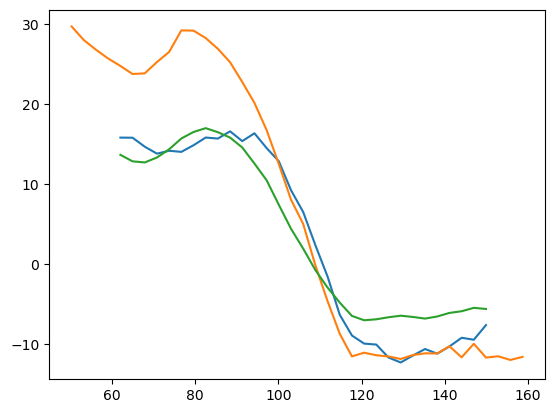

In [66]:
plt.plot(inputTable05['r'], model_xi05)
plt.plot(inputTable['r'], input_xi)
plt.plot(inputTable05['r'], inputTable05['xi']*inputTable05['r']**2)

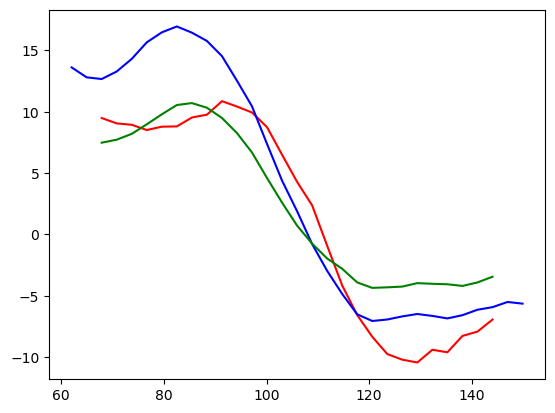

In [67]:
plt.plot(inputTable1['r'], model_xi1, c='r')
plt.plot(inputTable05['r'], inputTable05['xi']*inputTable05['r']**2, c='b')
plt.plot(inputTable1['r'], inputTable1['xi']*inputTable1['r']**2, c='g')

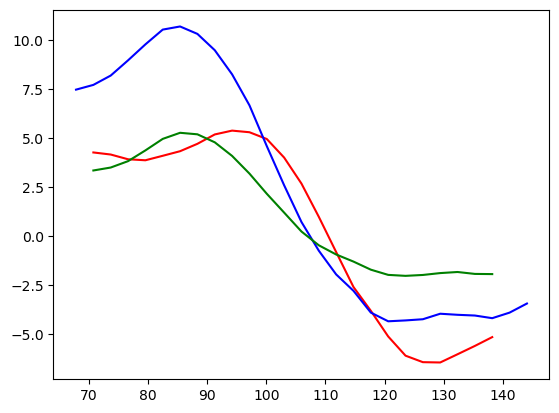

In [86]:
plt.plot(inputTable2['r'], model_xi2, c='r')
plt.plot(inputTable1['r'], inputTable1['xi']*inputTable1['r']**2, c='b')
plt.plot(inputTable2['r'], inputTable2['xi']*inputTable2['r']**2, c='g')

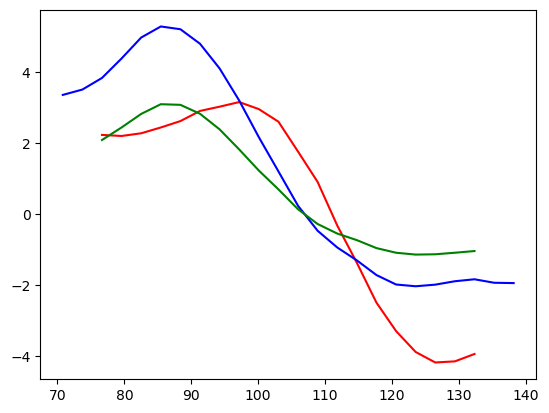

In [88]:
plt.plot(outputTable['r'], model_xi3, c='r')
plt.plot(inputTable2['r'], inputTable2['xi']*inputTable2['r']**2, c='b')
plt.plot(outputTable['r'], outputTable['xi']*outputTable['r']**2, c='g')

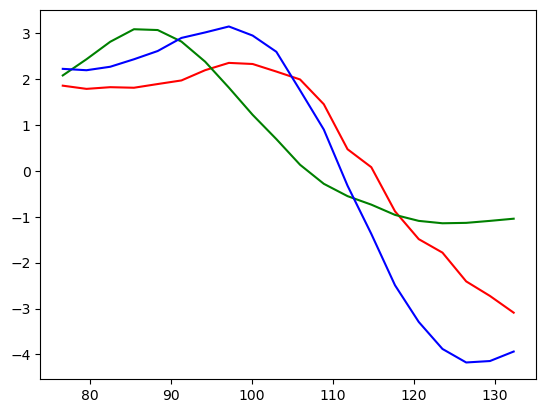

In [94]:
plt.plot(outputTable['r'], model_xi, c='r')
#plt.plot(inputTable['r'], inputTable['xi']*inputTable['r']**2, c='b')
plt.plot(outputTable['r'], outputTable['xi']*outputTable['r']**2, c='g')

plt.plot(outputTable['r'], model_xi3, c='b')
#plt.plot(outputTable['r'], outputTable['xi']*outputTable['r']**2, c='g')

In [118]:
def plotModel(start_plot, end_plot):
    
    # subplots stuff
    num_row = int((end_plot-start_plot)/2)
    fig, ax = plt.subplots(num_row, 2, figsize=[7,9], dpi=150)

    for x in range(start_plot, end_plot):
        inputTable = txt_to_table(x, 0)
        outputTable = txt_to_table(x, 3)

        inputTable = binCorr(inputTable, nBins)
        outputTable = binCorr(outputTable, nBins)

        inputTable = inputTable[(inputTable['r'] <= inputEnd0) & (inputTable['r'] >= inputStart0)]
        outputTable = outputTable[(outputTable['r'] <= outputEnd0) & (outputTable['r'] >= outputStart0)]


        input_xi = inputTable['xi']*inputTable['r']**2
        true_xi = outputTable['xi']*outputTable['r']**2
        model_xi05 = model_load0_05(torch.Tensor((inputTable['xi']*inputTable['r']**2-mean_inputs0)/var_inputs0)).detach().numpy()*var_outputs05+mean_outputs05
        model_xi1 = model_load05_1(torch.Tensor((model_xi05-mean_inputs05)/var_inputs05)).detach().numpy()*var_outputs1+mean_outputs1
        model_xi2 = model_load1_2(torch.Tensor((model_xi1-mean_inputs1)/var_inputs1)).detach().numpy()*var_outputs2+mean_outputs2
        model_xi3 = model_load2_3(torch.Tensor((model_xi2-mean_inputs2)/var_inputs2)).detach().numpy()*var_outputs3+mean_outputs3

        model_xi = model_load(torch.Tensor((inputTable['xi']*inputTable['r']**2-mean_inputsFull)/var_inputsFull)).detach().numpy()*var_outputsFull+mean_outputsFull

        
        ax_num = x - start_plot
        row = int(np.floor(ax_num/2))
        col = int((ax_num/2. - row)*2)
        #ax[row, col].plot(inputTable['r'], input_xi, c='b')
        ax[row, col].plot(outputTable['r'], true_xi, c='g', lw=1)
        ax[row, col].plot(outputTable['r'], model_xi, c='r', lw=1)
        ax[row, col].plot(outputTable['r'], model_xi3, c='orange', lw=1)

        

    custom_lines = [Line2D([0], [0], color='g', lw=2),
                    Line2D([0], [0], color='r', lw=2),
                    Line2D([0], [0], color='orange', lw=2)]

    if start_plot >= trainTestSplit:
        if end_plot - start_plot > 1:
            fig.suptitle(f'Validation Plots: Simulations {start_plot} - {end_plot - 1}', y=0.91)
        else:
            fig.suptitle(f'Validation Plot: Simulation {start_plot}', y=0.91)

    else:
        if end_plot - start_plot > 1:
            fig.suptitle(f'Training Plots: Simulations {start_plot} - {end_plot - 1}', y=0.91)
        else:
            fig.suptitle(f'Training Plot: Simulation {start_plot}', y=0.91)



    ax[-1, 0].set_xlabel('r')
    ax[-1, 1].set_xlabel('r')

    for i in range(num_row):
        ax[i, 0].set_ylabel('$\\xi r^2$')

    ax[0,0].legend(custom_lines, [f'True $\\xi$ at z={zOutput}', f'NN model $\\xi$ at z={zOutput}', f'Stacked NN model $\\xi$ at z={zOutput}'], fontsize=6)

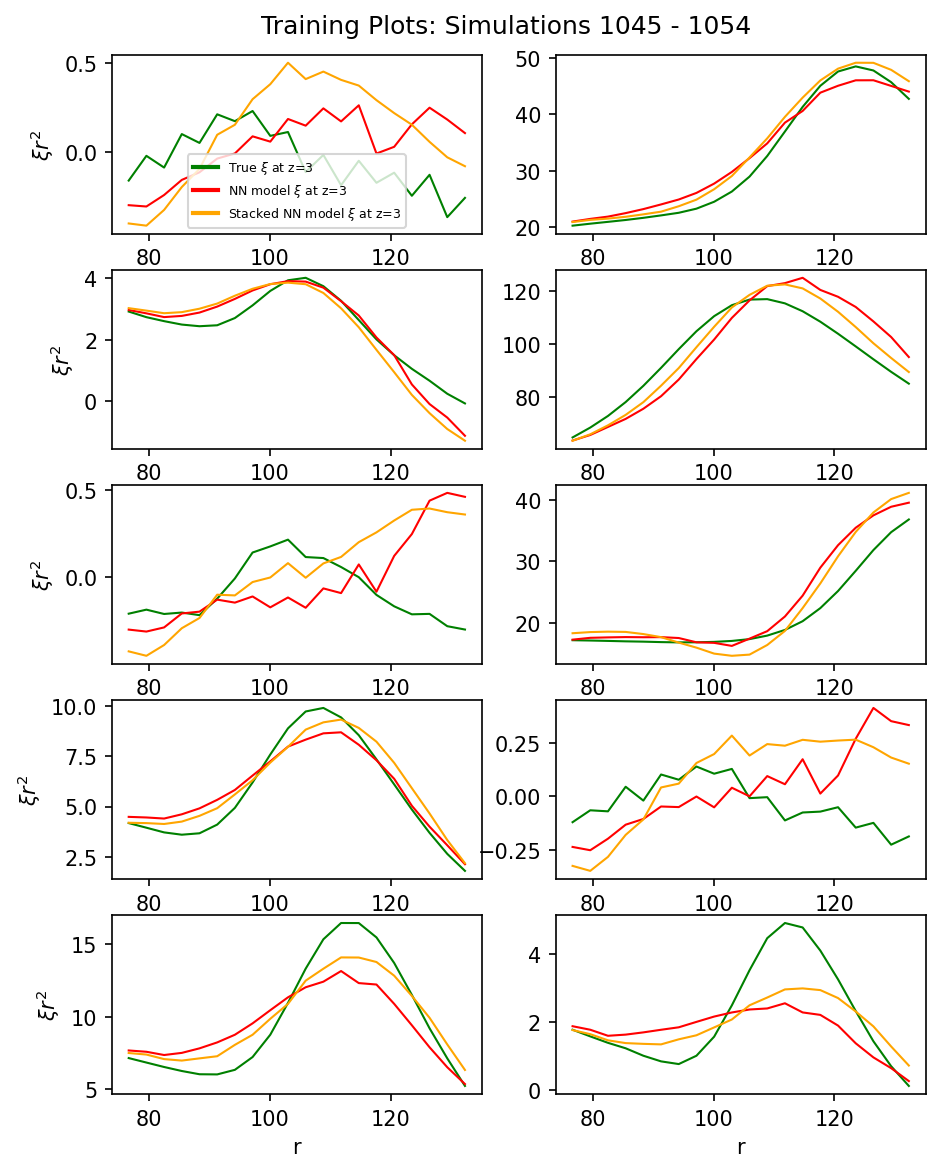

In [119]:
plotModel(1045, 1055)

In [112]:
def averageModel():
    startVal = trainTestSplit
    endVal = 2000
    
    outputTableTest = txt_to_table(startVal, 3)
    outputTableTest = binCorr(outputTableTest, nBins)
    outputTableTest = outputTableTest[(outputTableTest['r'] <= outputEnd) & (outputTableTest['r'] >= outputStart)]
    
    validation_output = np.zeros([endVal-startVal, len(outputTableTest)])
    validation_outputFull = np.zeros([endVal-startVal, len(outputTableTest)])

    true_output = np.zeros([endVal-startVal, len(outputTableTest)])

    for x in range(startVal, endVal):
        inputTable = txt_to_table(x, 0)
        outputTable = txt_to_table(x, 3)

        inputTable = binCorr(inputTable, nBins)
        outputTable = binCorr(outputTable, nBins)

        inputTable = inputTable[(inputTable['r'] <= inputEnd0) & (inputTable['r'] >= inputStart0)]
        outputTable = outputTable[(outputTable['r'] <= outputEnd0) & (outputTable['r'] >= outputStart0)]


        input_xi = inputTable['xi']*inputTable['r']**2
        true_xi = outputTable['xi']*outputTable['r']**2
        model_xi05 = model_load0_05(torch.Tensor((inputTable['xi']*inputTable['r']**2-mean_inputs0)/var_inputs0)).detach().numpy()*var_outputs05+mean_outputs05
        model_xi1 = model_load05_1(torch.Tensor((model_xi05-mean_inputs05)/var_inputs05)).detach().numpy()*var_outputs1+mean_outputs1
        model_xi2 = model_load1_2(torch.Tensor((model_xi1-mean_inputs1)/var_inputs1)).detach().numpy()*var_outputs2+mean_outputs2
        model_xi3 = model_load2_3(torch.Tensor((model_xi2-mean_inputs2)/var_inputs2)).detach().numpy()*var_outputs3+mean_outputs3

        model_xi = model_load(torch.Tensor((inputTable['xi']*inputTable['r']**2-mean_inputsFull)/var_inputsFull)).detach().numpy()*var_outputsFull+mean_outputsFull

        validation_output[x-startVal] = model_xi3
        validation_outputFull[x-startVal] = model_xi
        
        true_output[x-startVal] = true_xi
        
    validation_average = np.mean(validation_output, 0)
    validation_averageFull = np.mean(validation_outputFull, 0)

    true_average = np.mean(true_output, 0)
    
    
    plt.plot(outputTableTest['r'], validation_average, c='red')
    plt.plot(outputTableTest['r'], validation_averageFull, c='orange')

    plt.plot(outputTableTest['r'], true_average)

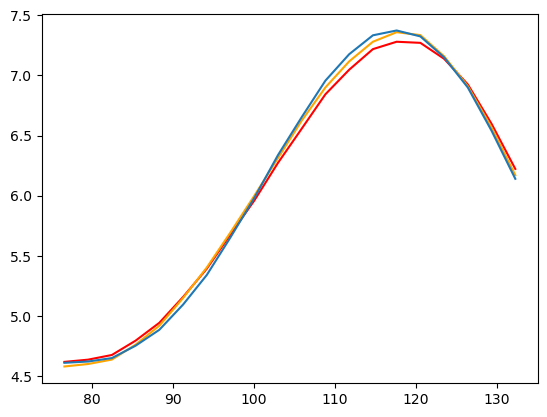

In [113]:
averageModel()